# Diabetes Analysis

### Author: Ly Duc Trung

### Link: https://github.com/DucTrung1802/DS/blob/main/GLM_Report/diabetes_analysis_upgrade.ipynb

### Dataset Link: https://www.archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

## 0. Install and import libraries

### 0.1. Check R version

In [181]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "4"

$minor
[1] "0.5"

$year
[1] "2021"

$month
[1] "03"

$day
[1] "31"

$`svn rev`
[1] "80133"

$language
[1] "R"

$version.string
[1] "R version 4.0.5 (2021-03-31)"

$nickname
[1] "Shake and Throw"

### 0.2. Install

In [182]:
# INSTALL THESE PACKAGES IN CONDA TERMINAL
# install.packages("ggplot2") / conda install r-ggplot2
# install.packages("psych") / conda install r-psych
# install.packages("DescTools") / conda install r-DescTools
# install.packages("BSDA") / conda install r-BSDA
# install.packages("gmodels") / conda install r-gmodels
# install.packages("rcompanion") / conda install r-rcompanion
# install.packages("pcaPP") / conda install r-pcaPP
# install.packages("corrplot") / conda install r-corrplot
# install.packages("caret") / conda install r-caret
# install.packages("MASS") / conda install r-MASS
# install.packages("pROC") / conda install r-pROC
# install.packages("DHARMa") / conda install r-DHARMa

### 0.3. Import

In [183]:
library(ggplot2)
library(psych)
library(DescTools)
library(BSDA)
library(gmodels)
library(rcompanion)
library(pcaPP)
library(corrplot)
library(caret)
library(MASS)
library(pROC)
library(DHARMa)

### 0.4. Constants

In [184]:
SEED = 123
MAIN_COLOR = "#1155cc"

## 1. Import Data

In [185]:
input_data = read.csv("diabetes_full_data.csv")

In [186]:
df = data.frame(input_data)

In [187]:
df

X,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,1,0,0,0,0,⋯,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,⋯,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,⋯,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,⋯,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,⋯,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,1,0,0,1,1,⋯,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,1,0,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,1,0,0,1,0,⋯,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,1,0,1,0,1,⋯,0,5,30,30,1,0,9,5,1,1


In [188]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ X                   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

## 2. Data Preprocessing

### 2.1. Standardize column names

In [189]:
colnames(df)

[1] "X"                    "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

In [190]:
# COMMENT: remove column "X"
if ("X" %in% colnames(df))
{
    df = df[, !colnames(df) == "X"]
}

In [191]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

### 2.2. Mismatched data types

In [192]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

In [193]:
# COMMENT
# All columns have correct data type

### 2.3. Mixed data values

In [194]:
# COMMENT
# Example: (female, woman, man, male) => (male, female)

In [195]:
# COMMENT
# This dataset contains only number data => No mixed data values

### 2.4. Missing data

#### 2.4.1 Null data

In [196]:
sum(is.na(df))

[1] 0

In [197]:
# COMMENT
# This dataset has no missing values

#### 2.4.2 Missing data in specific columns

In [198]:
nrow(subset(df, Age == 14))

[1] 0

In [199]:
# COMMENT
# We see that in column "Age", the value could have value of 14
# which is Don’t know / Refused / Missing (_AGEG5YR - BRFSS)

## 3. Exploratory data analysis (EDA)

### 3.0. Helper functions

In [200]:
plot_stack_bar_2x2 = function(table_2x2)
{
    barplot(table_2x2, beside = TRUE, col = c("green", "red"))
    legend("top", legend = rownames(table_2x2), fill = c("green", "red"))
}

In [201]:
get_correlation = function(dataframe, col_1, col_2, numerical_cols, binary_cols, ordinal_cols, response_col)
{
    if (col_1 %in% ordinal_cols || col_2 %in% ordinal_cols)
    {
        print("At least one ordinal variable")
        return (pcaPP::cor.fk(dataframe[,col_1], dataframe[,col_2]))
    }
    else if (col_1 %in% numerical_cols && col_2 %in% c(binary_cols, response_col) ||
             col_1 %in% c(binary_cols, response_col) && col_2 %in% numerical_cols)
    {
        print("Binary variable vs numerical variable")
        return (cor.test(as.numeric(dataframe[,col_1]), as.numeric(dataframe[,col_2]))$estimate)
    }
    else if (col_1 %in% c(binary_cols, response_col) && col_2 %in% c(binary_cols, response_col))
    {
        print("2 binary variables")
        return (rcompanion::cramerV(table(dataframe[ ,c(col_1, col_2)])))
    }
    else if (col_1 %in% numerical_cols && col_2 %in% numerical_cols)
    {
        print("Numerical variable vs numerical variable")
        return (cor(dataframe[,col_1], dataframe[,col_2]))
    }
    else
    {
        return (100)
    }
}

In [289]:
summary_categorical_variables = function(df, explain_col, response_col, is.binary = T, prop.r = T,
                                        prop.c = T, prop.t = T)
{
    contingency_table = table(df[, explain_col], df[, response_col], dnn = c(explain_col, response_col))
    if (is.binary)
    {       
        rownames(contingency_table) = c(paste("no", explain_col), explain_col)
        gmodels::CrossTable(contingency_table, prop.r = prop.r, prop.c = prop.c, prop.t = prop.t, prop.chisq = FALSE, chisq = T)
        print("Odds Ratio")
        print(OddsRatio(contingency_table, conf.level = 0.95))
        print("Relative Risk")
        print(RelRisk(contingency_table, conf.level = 0.95, method = "wald"))
    }
    else
    {
        CrossTable(contingency_table, prop.r = prop.r, prop.c = prop.c, prop.t = prop.t, prop.chisq = FALSE, chisq = T)
    }
}

In [295]:
plot_ordinal_data = function(dataframe, ordinal_col)
{
    barplot(summary(factor(dataframe[no_diabetes_rows, ][, ordinal_col])), main = sprintf("no_diabetes_rows - %s", ordinal_col),
           col = MAIN_COLOR, las = 1, lwd = 2)
    barplot(summary(factor(dataframe[with_diabetes_rows, ][, ordinal_col])), main = sprintf("no_diabetes_rows - %s", ordinal_col),
           col = MAIN_COLOR, las = 1, lwd = 2)
}

### 3.1. Detect Numerical, Binary, Ordinal variables

In [202]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

In [203]:
numerical_cols = c("BMI", "MentHlth", "PhysHlth")
binary_cols = c("HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
               "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
               "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
               "DiffWalk", "Sex")
ordinal_cols = c("GenHlth", "Age", "Education", "Income")
response_col = "Diabetes_binary"

display_matrix = matrix(c(length(numerical_cols), length(binary_cols), length(ordinal_cols)), nrow = 3)
rownames(display_matrix) = c("numerical_cols", "binary_cols", "ordinal_cols")
colnames(display_matrix) = "Number of variable"
display_matrix

,Number of variable
numerical_cols,3
binary_cols,14
ordinal_cols,4


### 3.2. Detect no_diabetes rows and with_diabetes rows

In [204]:
no_diabetes_rows = which(df$Diabetes_binary == 0)
with_diabetes_rows = which(df$Diabetes_binary == 1)

### 3.3. Data factorization

In [205]:
factorized_df = df

In [206]:
# Training data factorization
for (col in binary_cols)
{
    factorized_df[, col] = factor(factorized_df[, col])
}

for (col in ordinal_cols)
{
    factorized_df[, col] = factor(factorized_df[, col], ordered = T)
}

factorized_df[, response_col] = factor(factorized_df[, response_col])

In [207]:
str(factorized_df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "

### 3.4. Response variable analysis

In [208]:
plot_binary_distribution = function(dataframe, response_col, title)
{
    # Creating a table of counts for each category in the response column
    response_table <- table(dataframe[, response_col])

    # Converting the table into a data frame
    response_df <- as.data.frame(response_table)

    # Renaming the column
    colnames(response_df) <- c("Response", "Count")

    # Calculate percentages
    response_df$Percent <- response_df$Count / sum(response_df$Count) * 100

    # Creating a pie chart using ggplot2
    pie_chart <- ggplot(response_df, aes(x = "", y = Count, fill = Response)) +
      geom_bar(stat = "identity", width = 1) +
      coord_polar("y", start = 0) +
      scale_fill_manual(values = c("green", "red")) +
      labs(title = title) +
      theme_void() +
      theme(legend.position = "bottom",
            plot.title = element_text(hjust = 0.5, size = 30),  # Adjust title size here
            legend.text = element_text(size = 20)) +            # Adjust legend text size here
      geom_text(aes(label = paste0(round(Percent, 1), "%")),
                position = position_stack(vjust = 0.5),
                size = 7) + # Adjust label size here
      guides(fill = guide_legend(title = response_col, title.position = "top", title.theme = element_text(size = 15))) # Adjust legend title size here

    # Displaying the pie chart
    print(pie_chart)
}

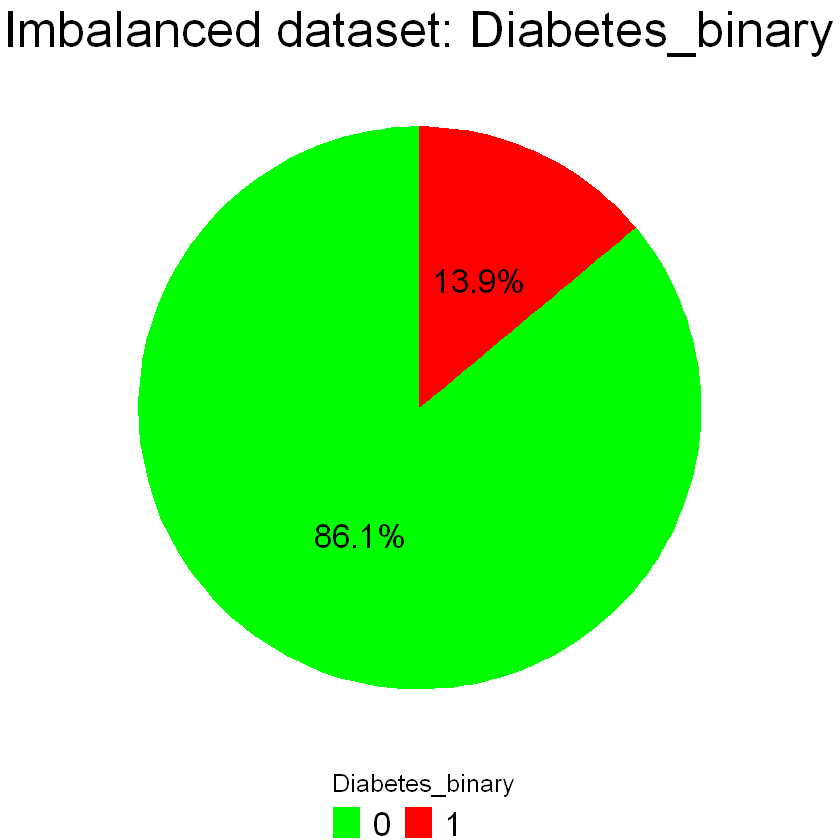

In [209]:
plot_binary_distribution(factorized_df, "Diabetes_binary", "Imbalanced dataset: Diabetes_binary")

In [210]:
# COMMENT
# The dataset is imbalanced

### 3.4. Numerical variables analysis

In [257]:
numerical_cols

[1] "BMI"      "MentHlth" "PhysHlth"

In [212]:
psych::describeBy(factorized_df[,numerical_cols], factorized_df[,response_col])


 Descriptive statistics by group 
group: 0
         vars      n  mean   sd median trimmed  mad min max range skew kurtosis
BMI         1 218334 27.81 6.29     27   27.15 4.45  12  98    86 2.33    13.62
MentHlth    2 218334  2.98 7.11      0    0.94 0.00   0  30    30 2.86     7.37
PhysHlth    3 218334  3.64 8.06      0    1.30 0.00   0  30    30 2.50     5.00
           se
BMI      0.01
MentHlth 0.02
PhysHlth 0.02
------------------------------------------------------------ 
group: 1
         vars     n  mean    sd median trimmed  mad min max range skew kurtosis
BMI         1 35346 31.94  7.36     31   31.24 5.93  13  98    85 1.53     5.72
MentHlth    2 35346  4.46  8.95      0    2.02 0.00   0  30    30 2.06     2.87
PhysHlth    3 35346  7.95 11.30      1    6.19 1.48   0  30    30 1.15    -0.34
           se
BMI      0.04
MentHlth 0.05
PhysHlth 0.06

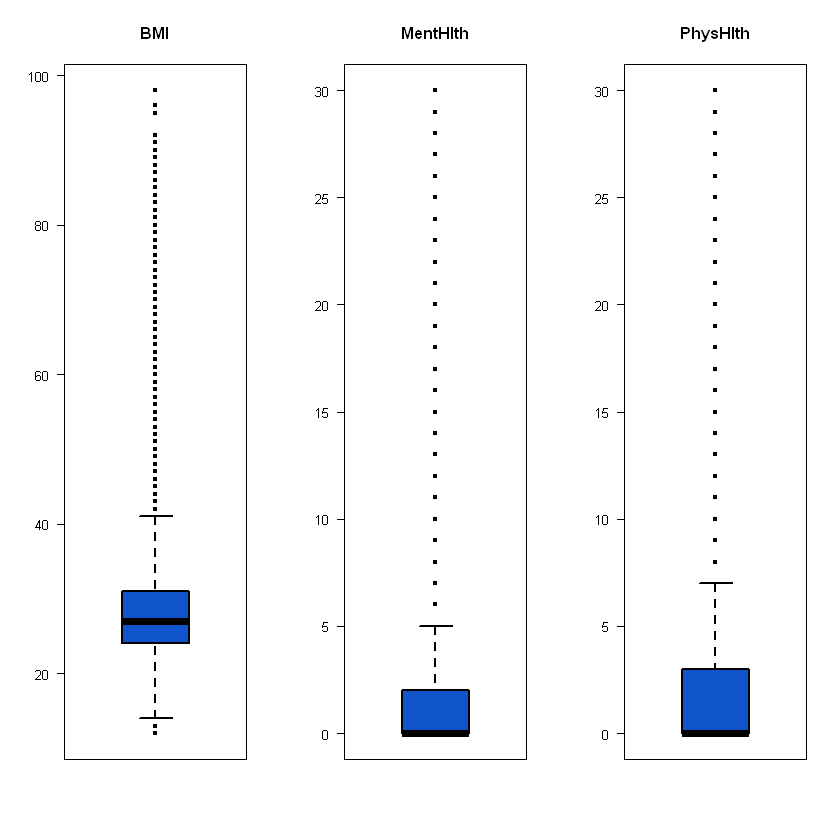

In [213]:
par(mfrow = c(1,3))
boxplot(factorized_df$BMI, main = "BMI", col = MAIN_COLOR, las = 1, lwd = 2)
boxplot(factorized_df$MentHlth, main = "MentHlth", col = MAIN_COLOR, las = 1, lwd = 2)
boxplot(factorized_df$PhysHlth, main = "PhysHlth", col = MAIN_COLOR, las = 1, lwd = 2)

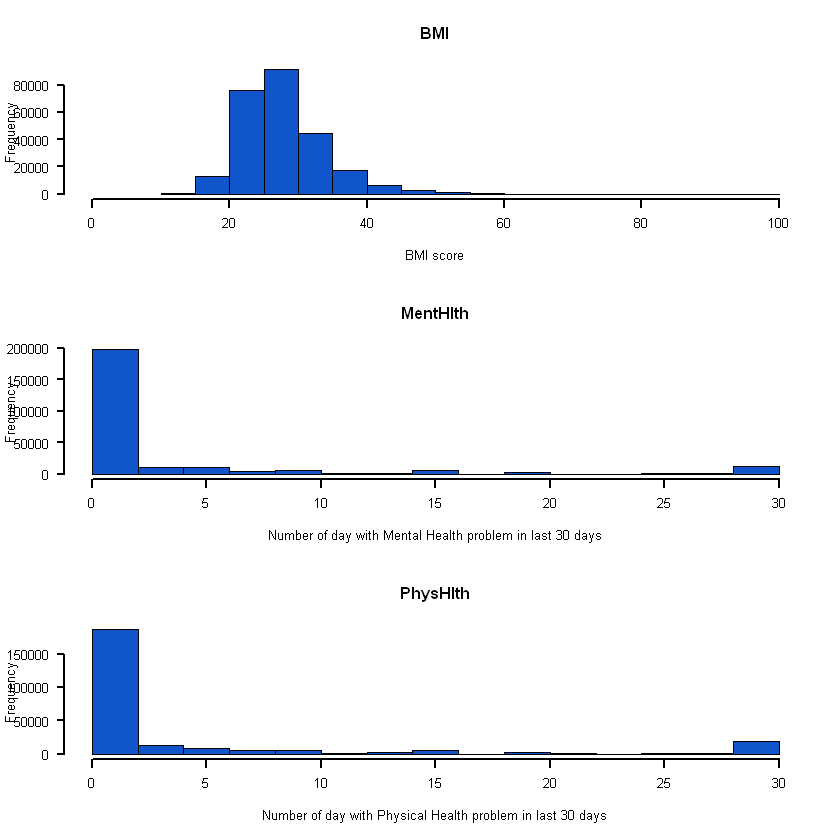

In [214]:
par(mfrow = c(3,1))
hist(factorized_df$BMI, main = "BMI", xlab = "BMI score", col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 100))
hist(factorized_df$MentHlth, main = "MentHlth", xlab = "Number of day with Mental Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2)
hist(factorized_df$PhysHlth, main = "PhysHlth", xlab = "Number of day with Physical Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2)

#### 3.4.1. BMI

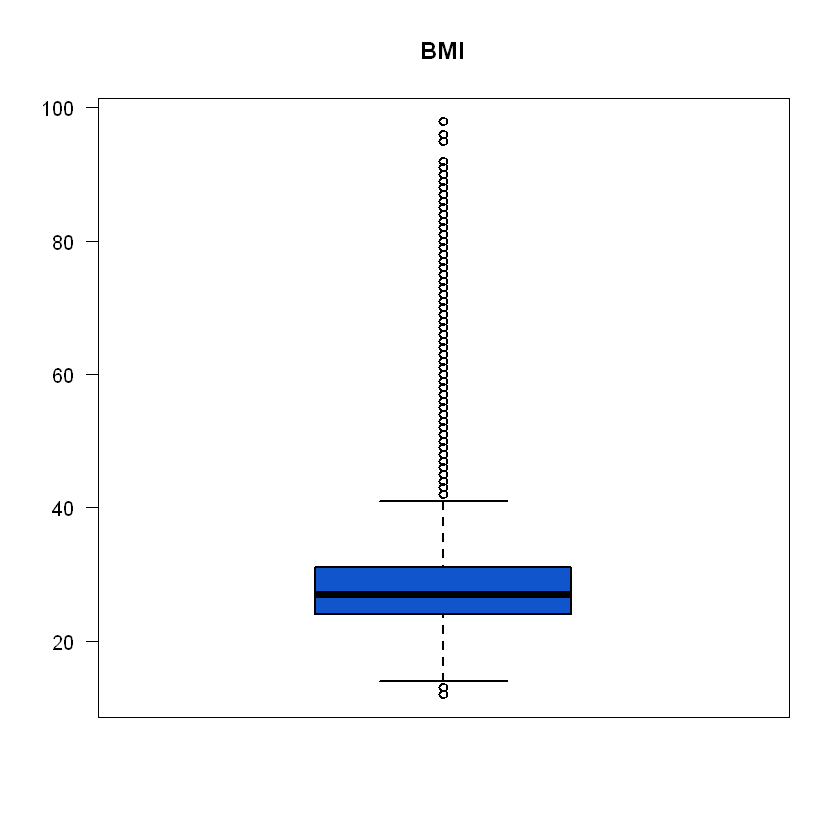

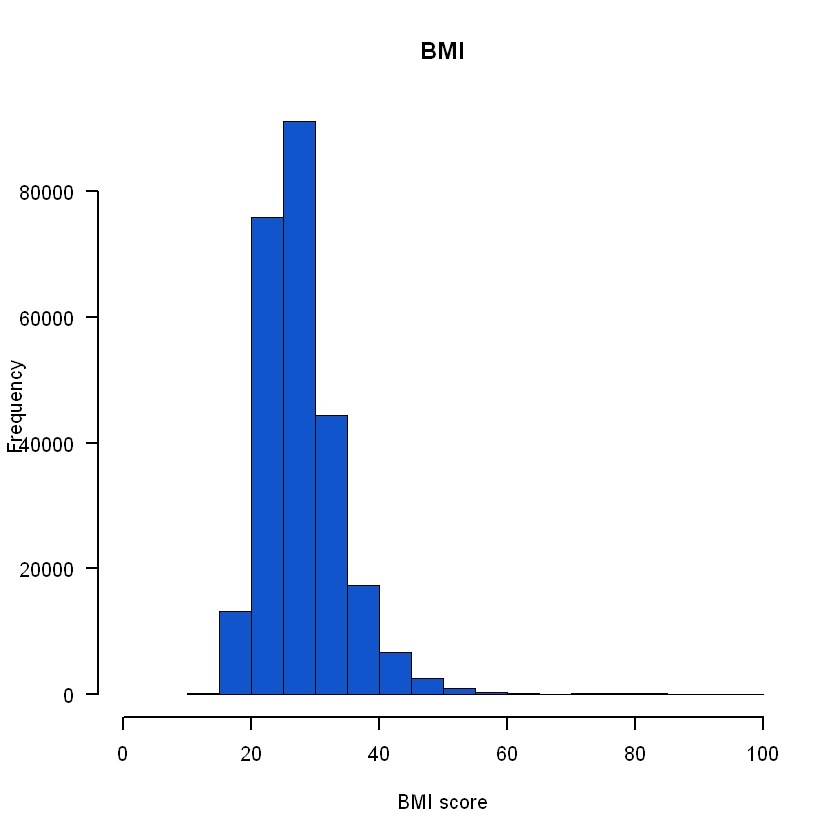

In [215]:
boxplot(factorized_df$BMI, main = "BMI", col = MAIN_COLOR, las = 1, lwd = 2)
hist(factorized_df$BMI, main = "BMI", xlab = "BMI score", col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 100))

In [258]:
describeBy(factorized_df[no_diabetes_rows, ]$BMI)
describeBy(factorized_df[with_diabetes_rows, ]$BMI)

Warning message in describeBy(factorized_df[no_diabetes_rows, ]$BMI):
"no grouping variable requested"


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,218334,27.80577,6.291414,27,27.1532,4.4478,12,98,86,2.331081,13.61643,0.01346442


Warning message in describeBy(factorized_df[with_diabetes_rows, ]$BMI):
"no grouping variable requested"


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,35346,31.94401,7.363401,31,31.23527,5.9304,13,98,85,1.526888,5.71591,0.03916592


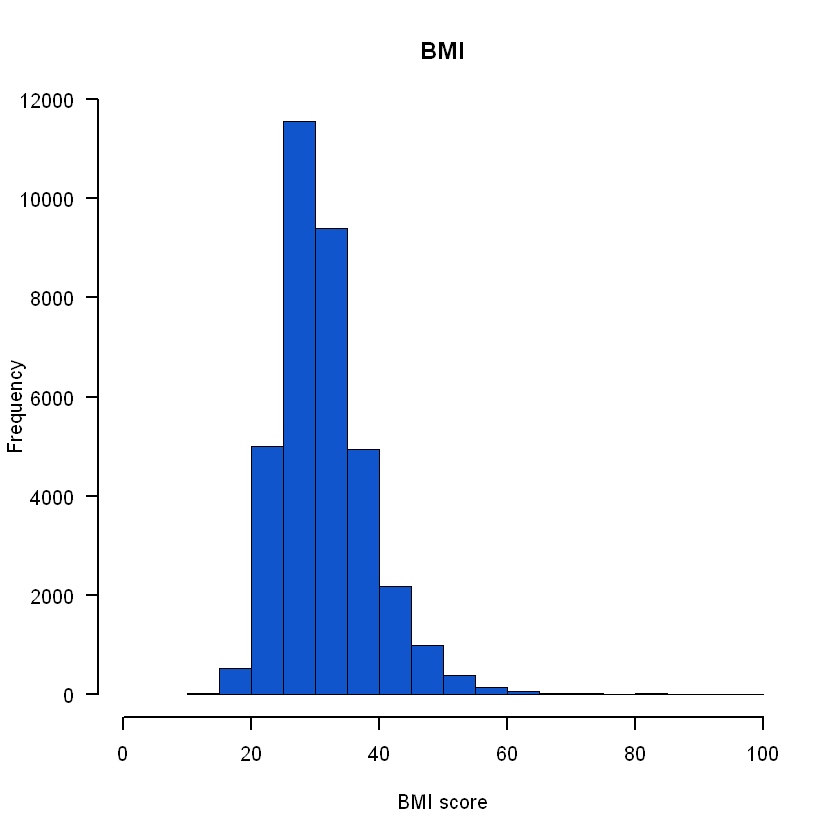

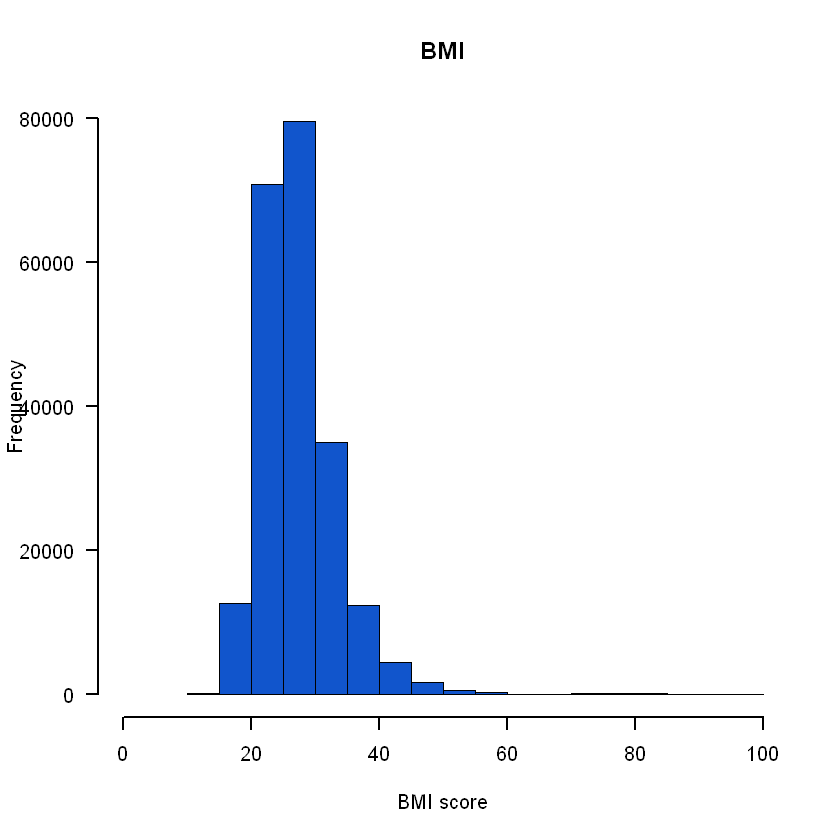

In [218]:
hist(factorized_df[with_diabetes_rows, ]$BMI, main = "BMI", xlab = "BMI score", col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 100))
hist(factorized_df[no_diabetes_rows, ]$BMI, main = "BMI", xlab = "BMI score", col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 100))

In [219]:
get_correlation(factorized_df, "BMI", response_col, numerical_cols, binary_cols, ordinal_cols, response_col)

[1] "Binary variable vs numerical variable"


cor 
0.2168431

In [220]:
BMI_q1 = quantile(factorized_df$BMI, probs = 0.25, names = F)
BMI_q3 = quantile(factorized_df$BMI, probs = 0.75, names = F)
BMI_upper_quartile = BMI_q3 + 1.5 * (BMI_q3 - BMI_q1)
cat("Maximum value of boxplot BMI:", BMI_upper_quartile)

Maximum value of boxplot BMI: 41.5

#### Question: The percentage of diabetes people having BMI under 45 and over 45.

In [221]:
BMI_THRESH_HOLD = 41.5

In [222]:
BMI_table = table(ifelse(factorized_df$BMI > BMI_THRESH_HOLD, sprintf("BMI > %g", BMI_THRESH_HOLD), sprintf("BMI < %g", BMI_THRESH_HOLD)),
      ifelse(factorized_df$Diabetes_binary == 1, "diabetes", "no diabetes"))
BMI_table = BMI_table[, c(2, 1)]
BMI_table

            
             no diabetes diabetes
  BMI < 41.5      211879    31981
  BMI > 41.5        6455     3365

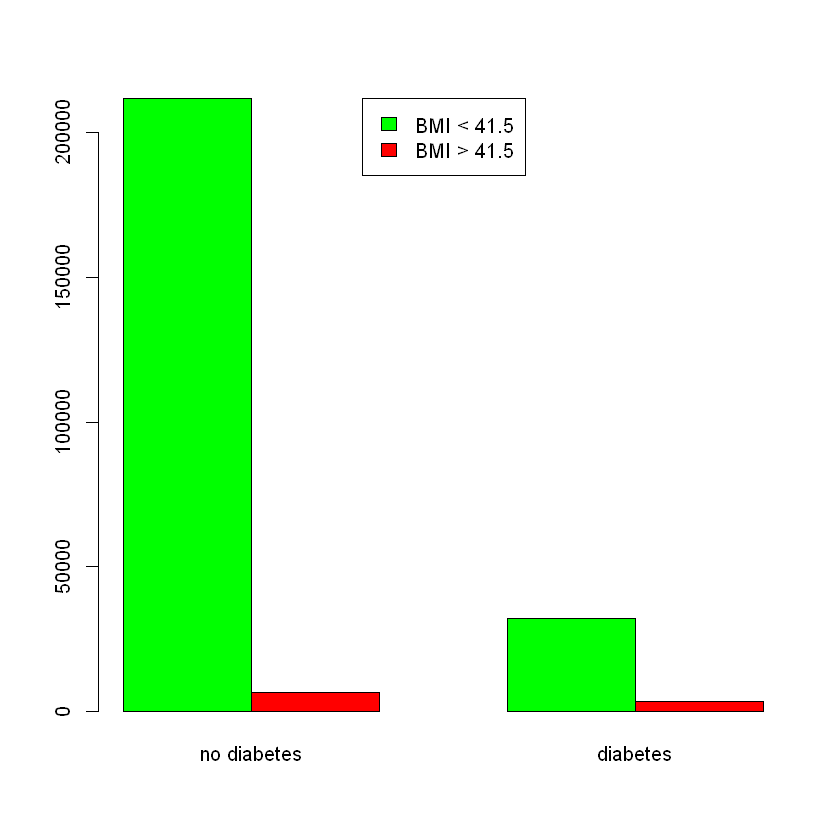

In [223]:
plot_stack_bar_2x2(BMI_table)

In [224]:
DescTools::OddsRatio(BMI_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  3.453701   3.307344   3.606533

In [225]:
# COMMENT
# odds ratio = 3.453 > 1
# People with BMI over 41.5 are 3.453 times more likely to have diabetes than others.
# => Create a binary variable that to distinguish people having BMI over 45.

In [226]:
if (!"BMI_over_41.5" %in% binary_cols)
{
    binary_cols = append(binary_cols, "BMI_over_41.5")
    new_column = factor(as.integer(ifelse(factorized_df$BMI > BMI_THRESH_HOLD, 1, 0)))
    BMI_index = which(colnames(factorized_df) == "BMI")
    factorized_df = cbind(factorized_df[,1:BMI_index], BMI_over_41.5 = new_column, factorized_df[,(BMI_index+1):ncol(factorized_df)])
}

In [227]:
str(factorized_df)

'data.frame':	253680 obs. of  23 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ BMI_over_41.5       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "

In [180]:
get_correlation(factorized_df, "BMI_over_41.5", response_col, numerical_cols, binary_cols, ordinal_cols, response_col)

[1] "2 binary variables"


Cramer V 
  0.1178

In [228]:
get_correlation(factorized_df, "BMI", response_col, numerical_cols, binary_cols, ordinal_cols, response_col)

[1] "Binary variable vs numerical variable"


cor 
0.2168431

In [229]:
# COMMENT
# Correlation of new explain variable: BMI_over_45 is lower than original explain variable
# => Eliminate this explain variable

In [230]:
if ("BMI_over_41.5" %in% binary_cols)
{
    factorized_df = subset(factorized_df, select = -BMI_over_41.5)
    binary_cols = binary_cols[binary_cols != "BMI_over_41.5"]
}

In [231]:
str(factorized_df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "

#### 3.4.2. MentHlth

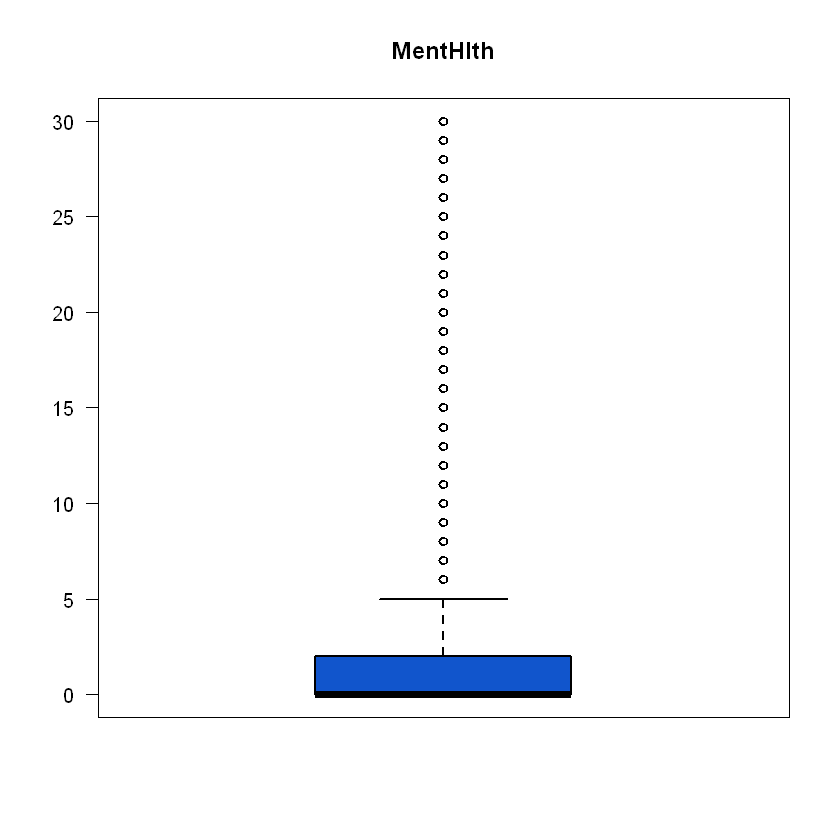

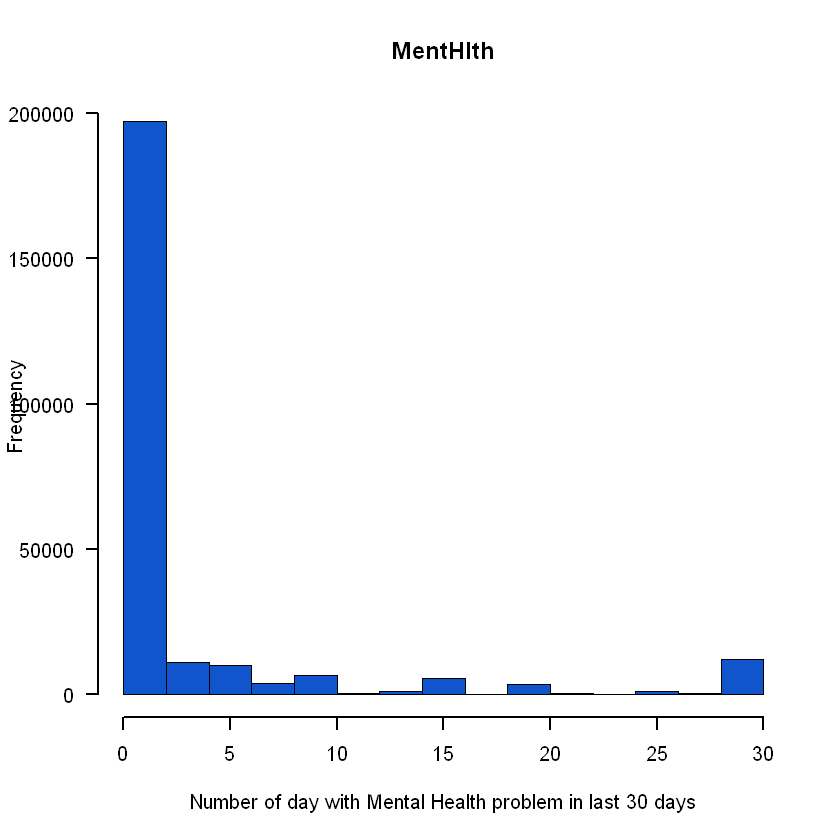

In [232]:
boxplot(factorized_df$MentHlth, main = "MentHlth", col = MAIN_COLOR, las = 1, lwd = 2)
hist(factorized_df$MentHlth, main = "MentHlth", xlab = "Number of day with Mental Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 30))

In [259]:
describeBy(factorized_df[no_diabetes_rows, ]$MentHlth)
describeBy(factorized_df[with_diabetes_rows, ]$MentHlth)

Warning message in describeBy(factorized_df[no_diabetes_rows, ]$MentHlth):
"no grouping variable requested"


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,218334,2.978034,7.111865,0,0.9377047,0,0,30,30,2.862762,7.366101,0.01522029


Warning message in describeBy(factorized_df[with_diabetes_rows, ]$MentHlth):
"no grouping variable requested"


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,35346,4.461806,8.947717,0,2.016126,0,0,30,30,2.064993,2.872268,0.0475929


#### Question: The percentage of diabetes people having MentHlth or not.

In [233]:
MentHlth_table = table(ifelse(factorized_df$MentHlth > 0, "have MentHlth", "no MentHlth"),
      ifelse(factorized_df$Diabetes_binary == 1, "diabetes", "no diabetes"))

In [234]:
MentHlth_table = Rev(MentHlth_table)

In [235]:
MentHlth_table

               
                no diabetes diabetes
  no MentHlth        152277    23403
  have MentHlth       66057    11943

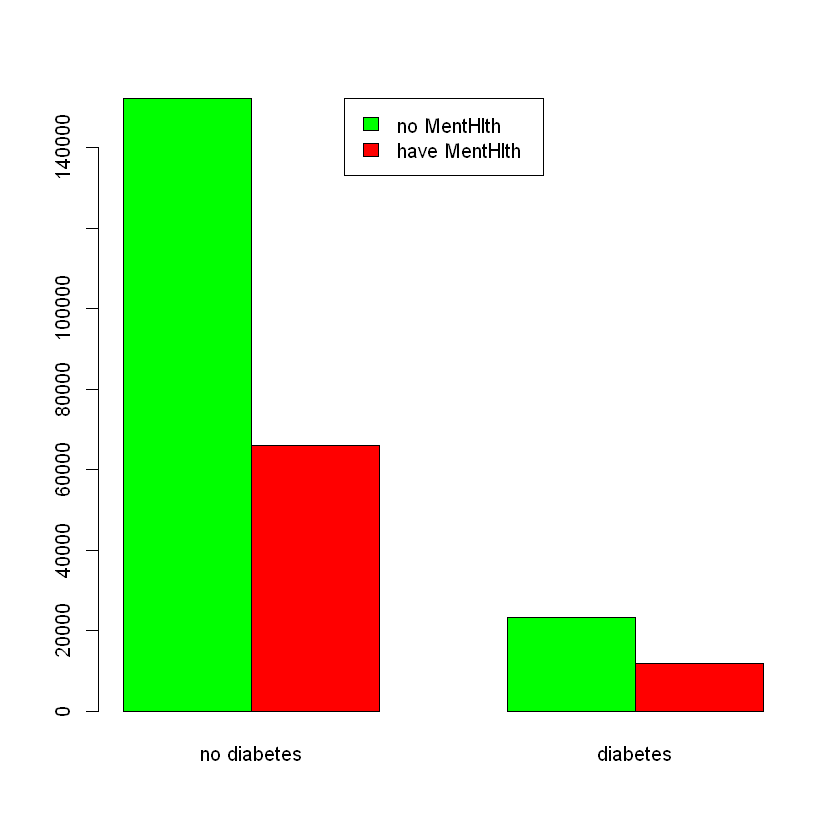

In [236]:
plot_stack_bar_2x2(MentHlth_table)

In [237]:
DescTools::OddsRatio(MentHlth_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  1.176406   1.148673   1.204810

In [238]:
# COMMENT
# odd ratio is close to 1
# => No creating new binary variable

#### 3.4.3. PhysHlth

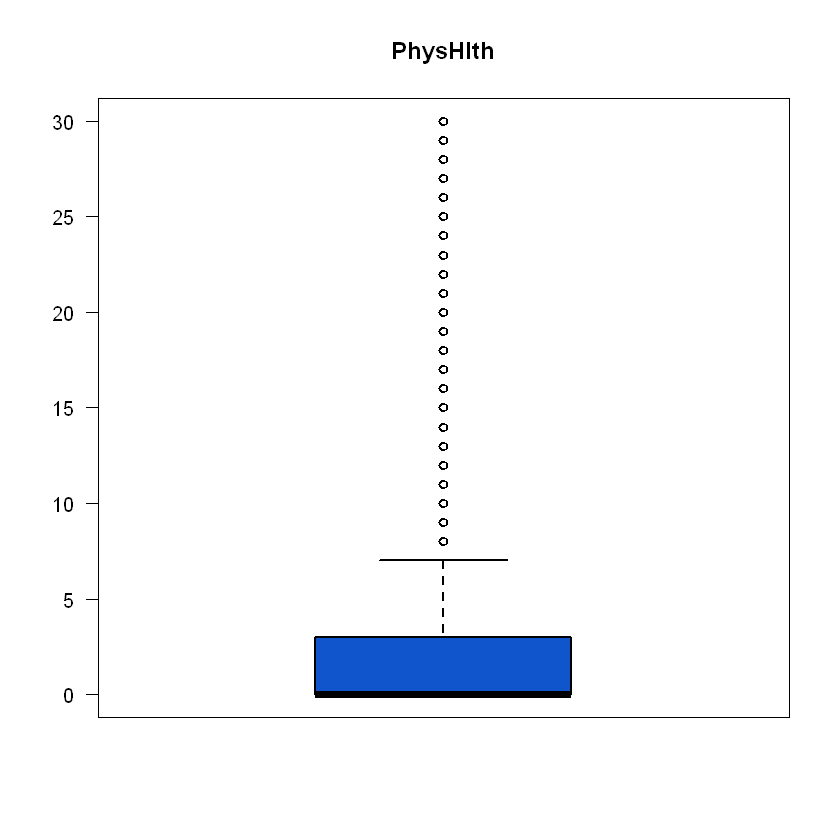

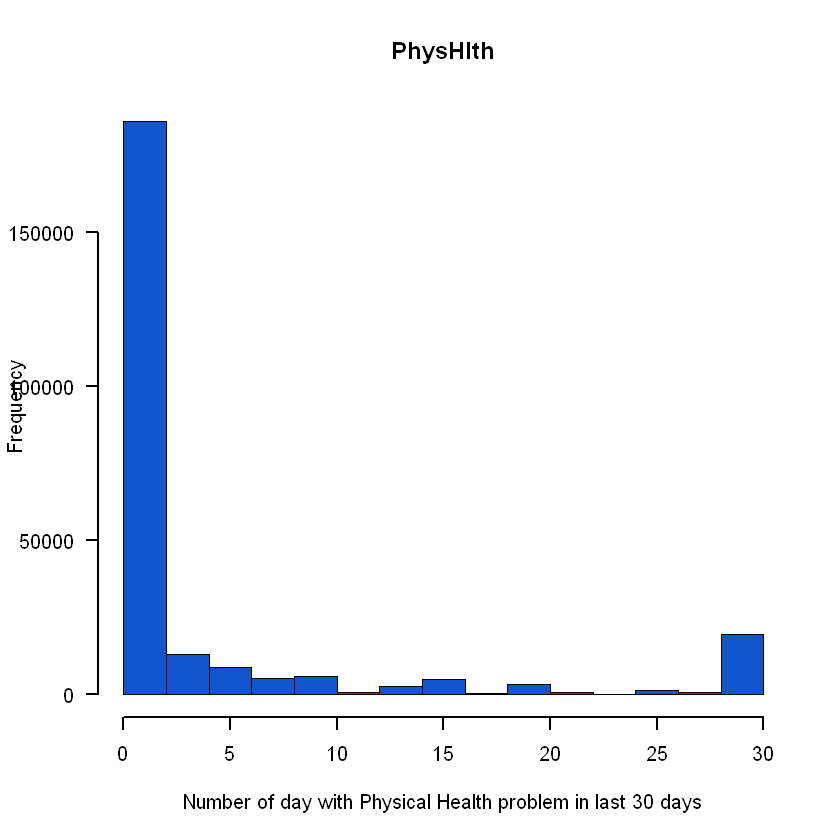

In [239]:
boxplot(factorized_df$PhysHlth, main = "PhysHlth", col = MAIN_COLOR, las = 1, lwd = 2)
hist(factorized_df$PhysHlth, main = "PhysHlth", xlab = "Number of day with Physical Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 30))

In [260]:
describeBy(factorized_df[no_diabetes_rows, ]$PhysHlth)
describeBy(factorized_df[with_diabetes_rows, ]$PhysHlth)

Warning message in describeBy(factorized_df[no_diabetes_rows, ]$PhysHlth):
"no grouping variable requested"


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,218334,3.641082,8.0646,0,1.304555,0,0,30,30,2.496733,5.003906,0.01725926


Warning message in describeBy(factorized_df[with_diabetes_rows, ]$PhysHlth):
"no grouping variable requested"


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,35346,7.954479,11.30149,1,6.193472,1.4826,0,30,30,1.14995,-0.3421938,0.06011261


In [240]:
get_correlation(factorized_df, "PhysHlth", response_col, numerical_cols, binary_cols, ordinal_cols, response_col)

[1] "Binary variable vs numerical variable"


cor 
0.1713367

#### Question: The percentage of diabetes people having PhysHlth or not.

In [242]:
PhysHlth_table = table(ifelse(factorized_df$PhysHlth > 0, "have PhysHlth", "no PhysHlth"),
      ifelse(factorized_df$Diabetes_binary == 1, "diabetes", "no diabetes"))

In [243]:
PhysHlth_table = Rev(PhysHlth_table)

In [244]:
PhysHlth_table

               
                no diabetes diabetes
  no PhysHlth        143312    16740
  have PhysHlth       75022    18606

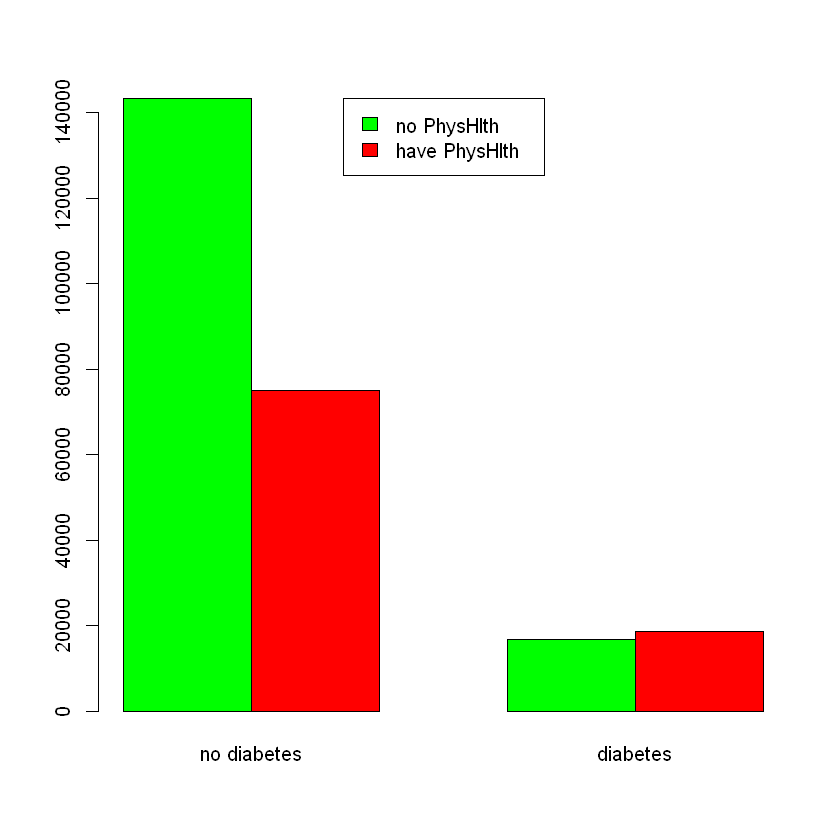

In [245]:
plot_stack_bar_2x2(PhysHlth_table)

In [246]:
OddsRatio(PhysHlth_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  2.123203   2.075610   2.171887

In [247]:
# odds ratio = 2.123 > 1
# People have PhysHlth are 2.123 times more likely to have diabetes than others.
# => Create a binary variable that to distinguish people having PhysHlth.

In [248]:
if (! "havePhysHlth" %in% binary_cols)
{
    binary_cols = append(binary_cols, "havePhysHlth")
    new_column = factor(as.integer(ifelse(factorized_df$PhysHlth > 0, 1, 0)))
    PhysHlth_index = which(colnames(factorized_df) == "PhysHlth")
    factorized_df = cbind(factorized_df[,1:PhysHlth_index], havePhysHlth = new_column, factorized_df[,(PhysHlth_index+1):ncol(factorized_df)])
}

In [249]:
str(factorized_df)

'data.frame':	253680 obs. of  23 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "

In [250]:
get_correlation(factorized_df, "havePhysHlth", response_col, numerical_cols, binary_cols, ordinal_cols, response_col)

[1] "2 binary variables"


Cramer V 
  0.1312

In [251]:
get_correlation(factorized_df, "PhysHlth", response_col, numerical_cols, binary_cols, ordinal_cols, response_col)

[1] "Binary variable vs numerical variable"


cor 
0.1713367

In [252]:
# COMMENT
# Correlation of new explain variable: havePhysHlth is lower than original explain variable
# => Eliminate this explain variable

In [281]:
if ("havePhysHlth" %in% binary_cols)
{
    factorized_df = subset(factorized_df, select = -havePhysHlth)
    binary_cols = binary_cols[binary_cols != "havePhysHlth"]
}

In [282]:
str(factorized_df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "

### 3.5. Categorical - binary variables analysis

In [283]:
binary_cols

[1] "HighBP"               "HighChol"             "CholCheck"           
 [4] "Smoker"               "Stroke"               "HeartDiseaseorAttack"
 [7] "PhysActivity"         "Fruits"               "Veggies"             
[10] "HvyAlcoholConsump"    "AnyHealthcare"        "NoDocbcCost"         
[13] "DiffWalk"             "Sex"

[1] "HighBP"


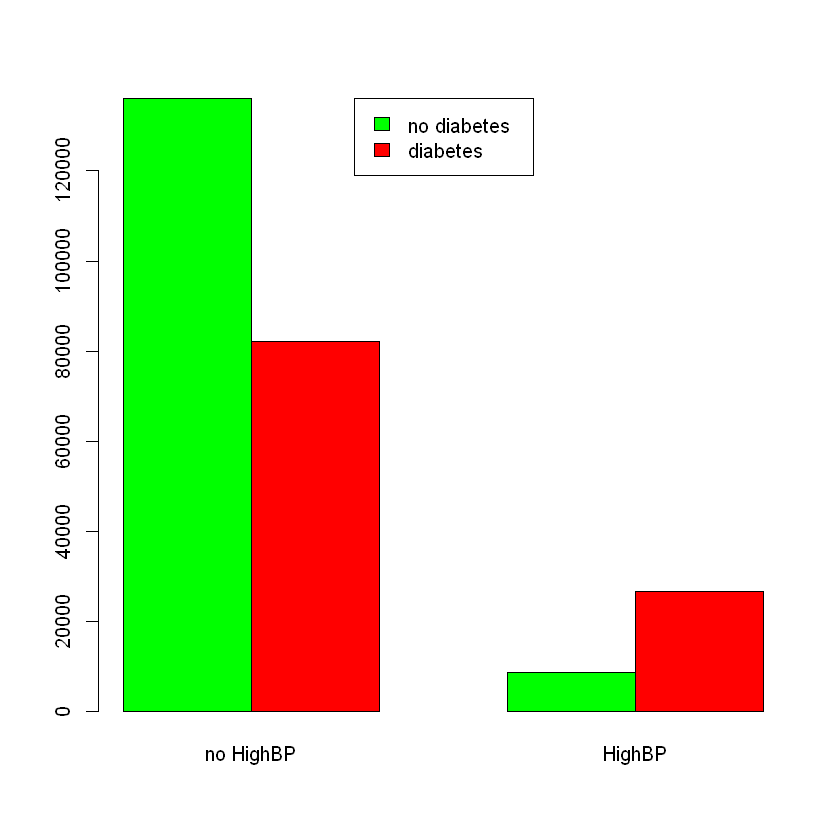

[1] "HighChol"


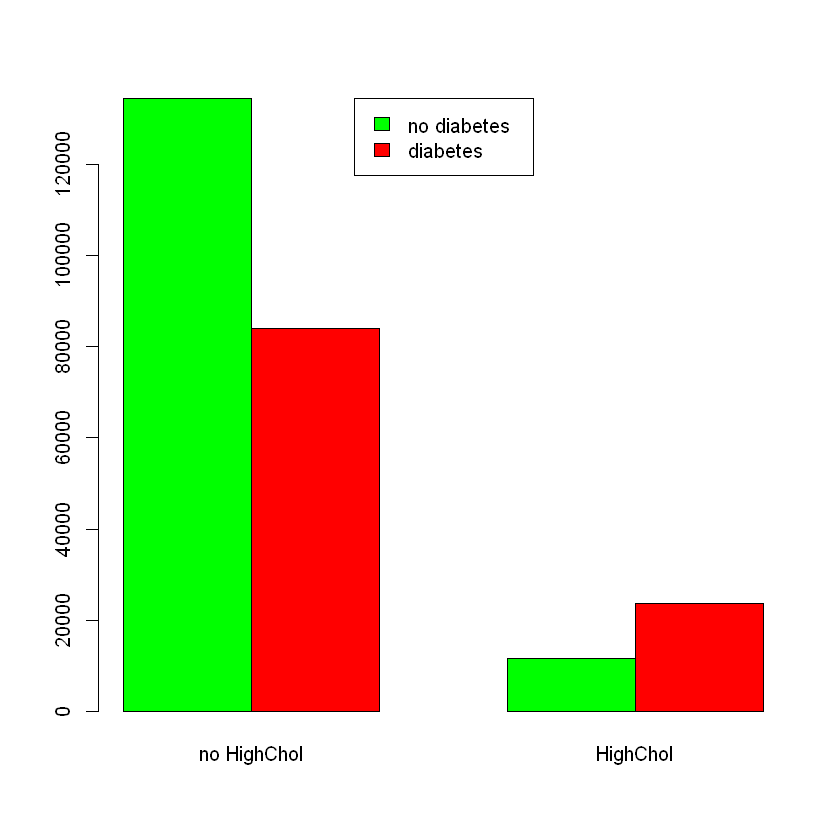

[1] "CholCheck"


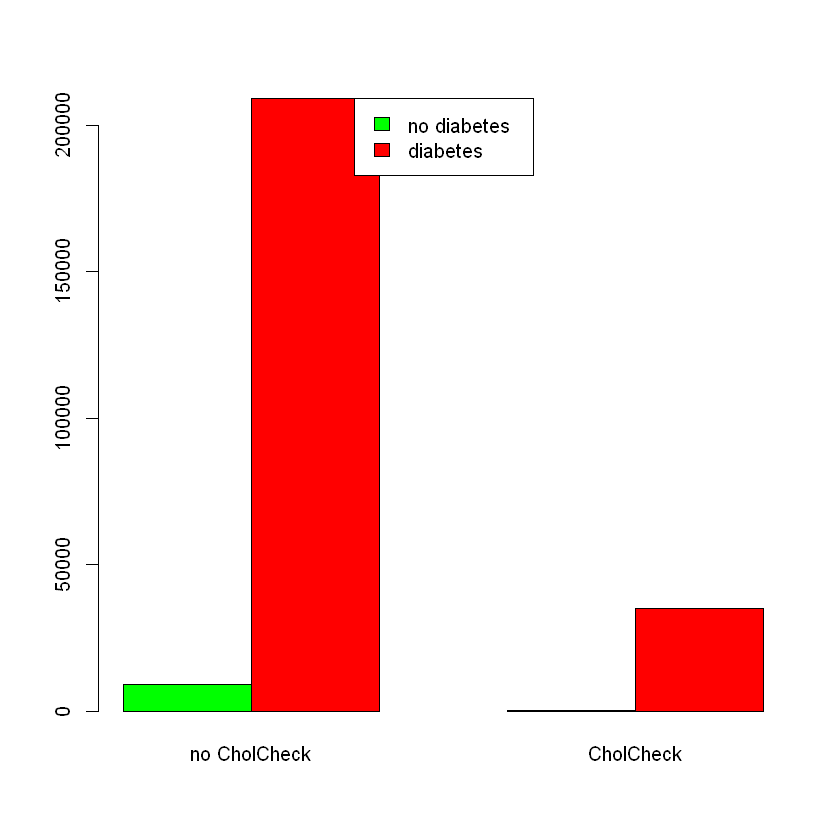

[1] "Smoker"


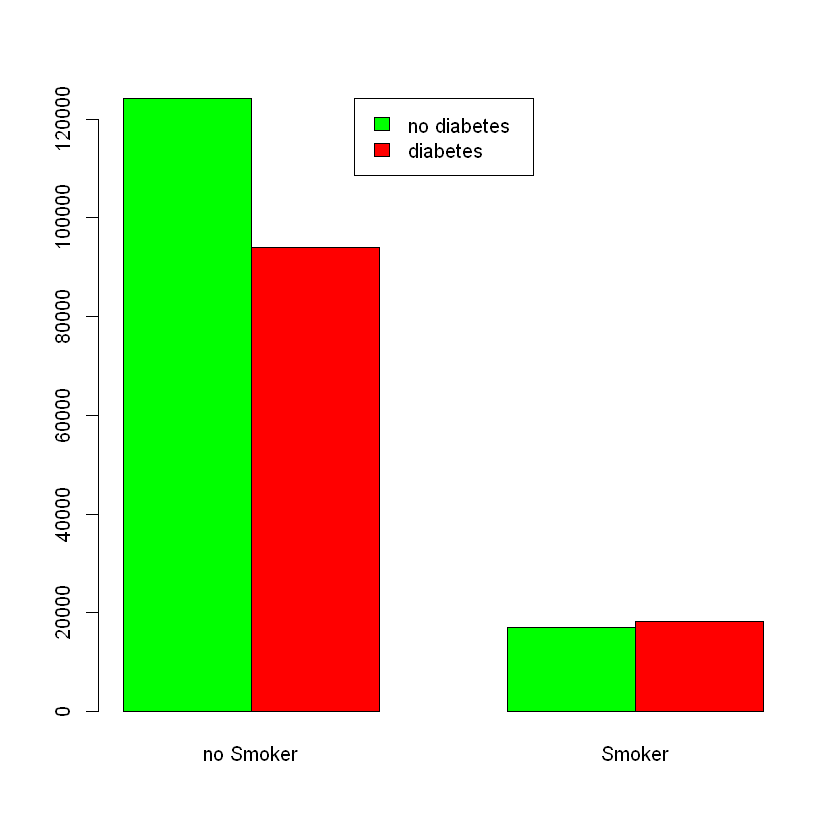

[1] "Stroke"


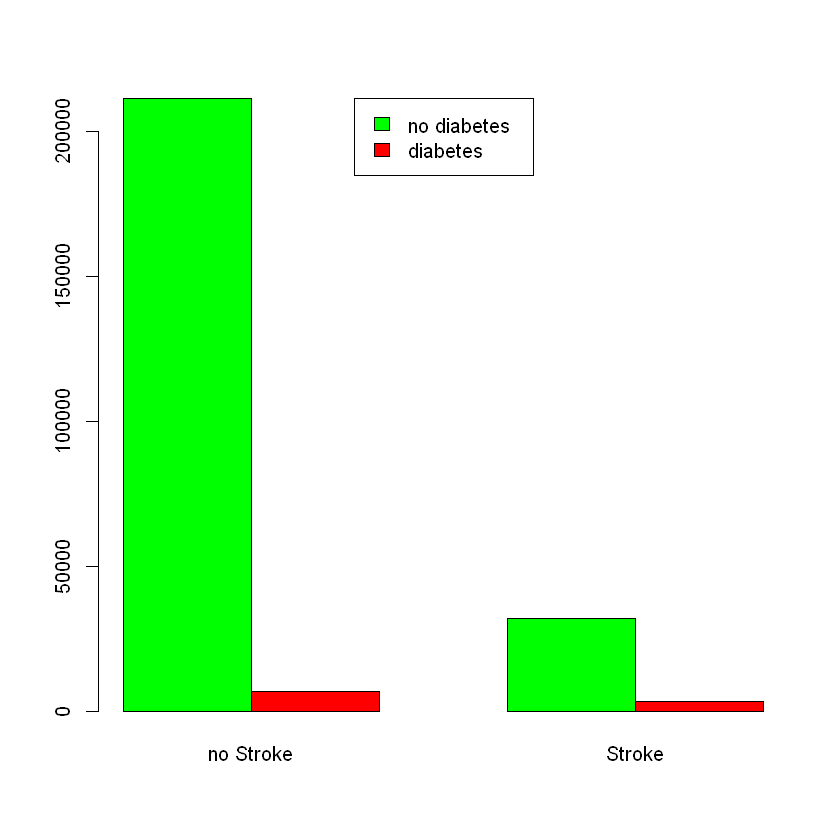

[1] "HeartDiseaseorAttack"


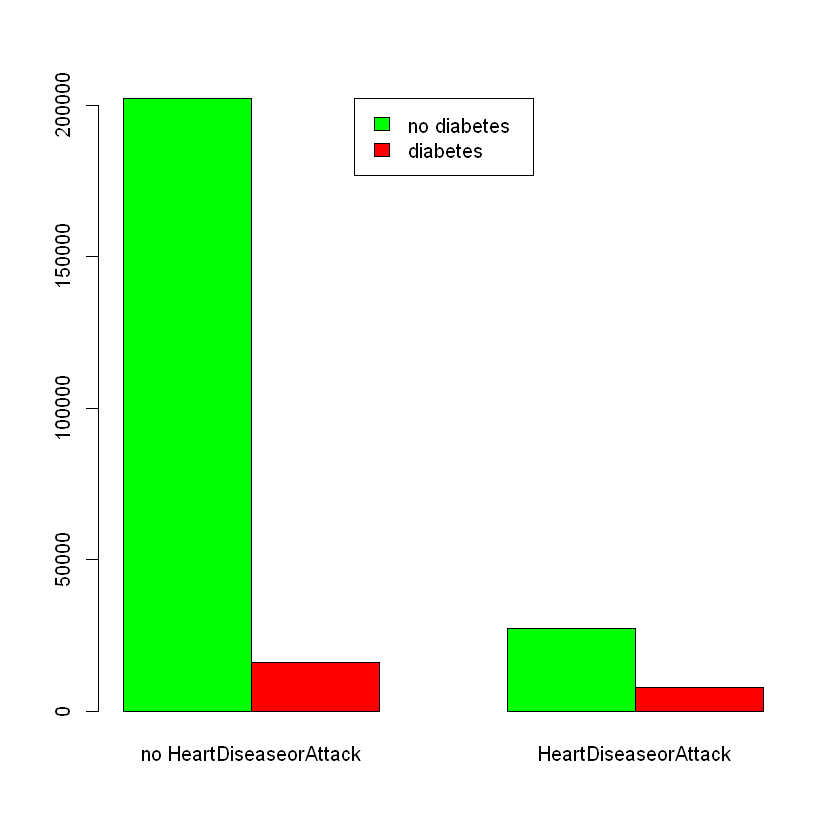

[1] "PhysActivity"


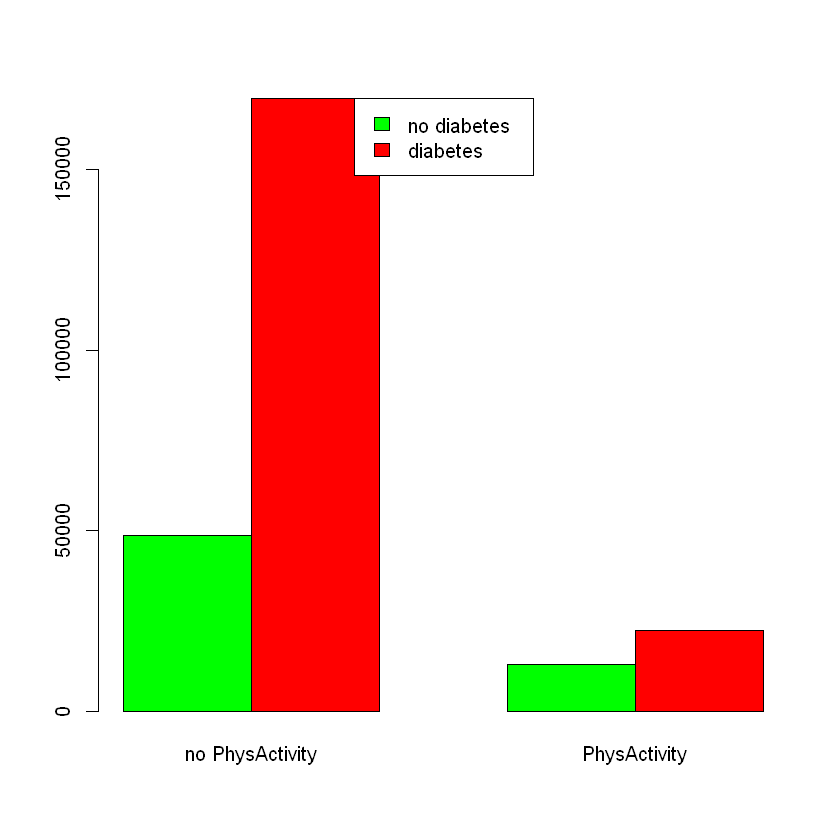

[1] "Fruits"


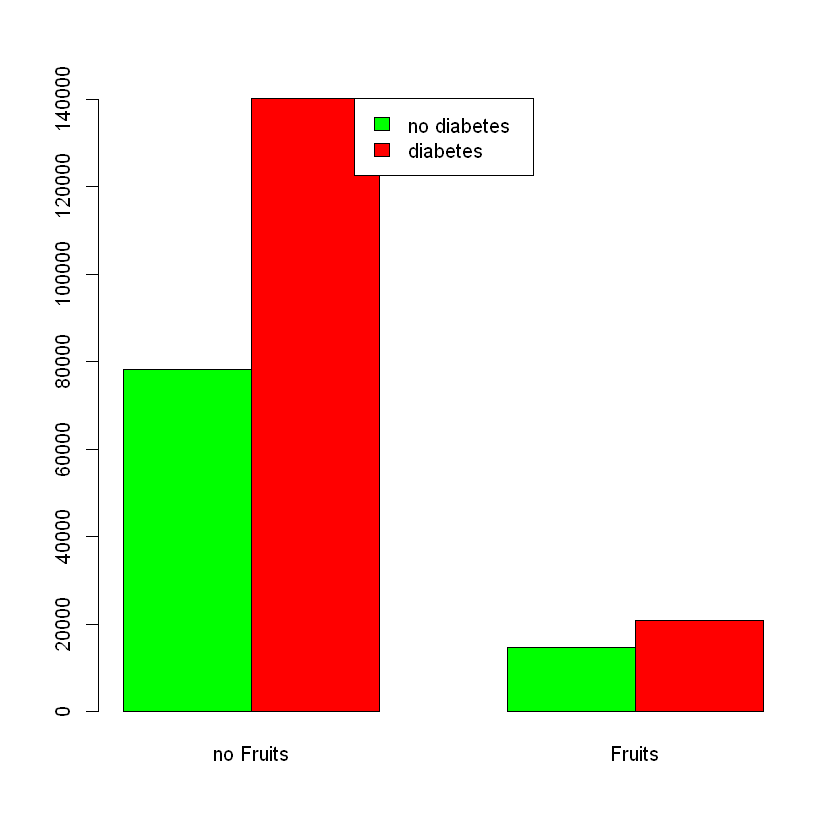

[1] "Veggies"


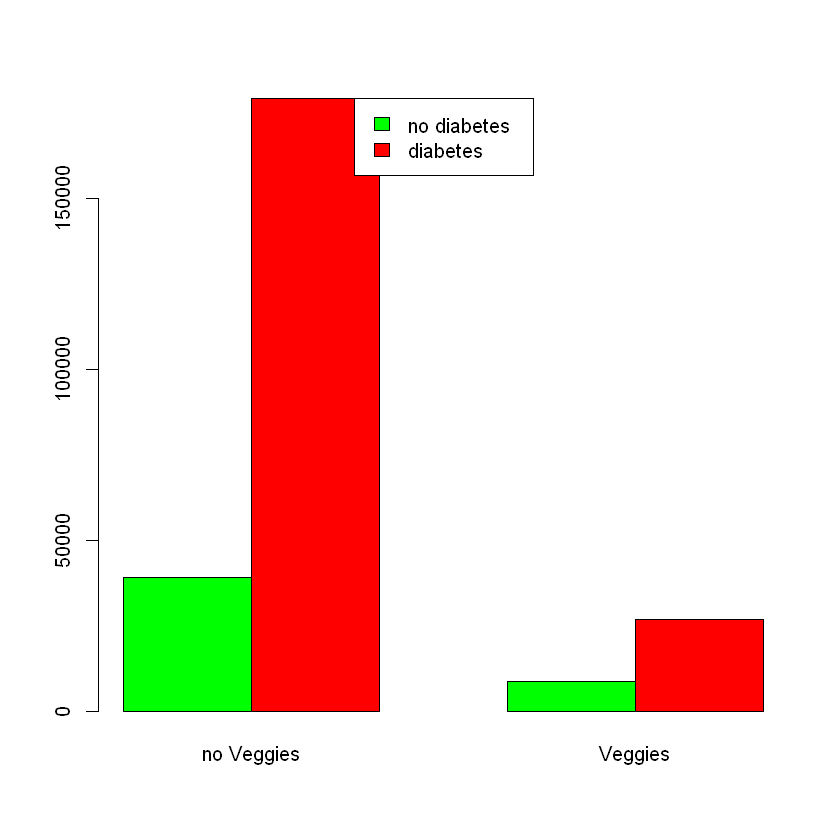

[1] "HvyAlcoholConsump"


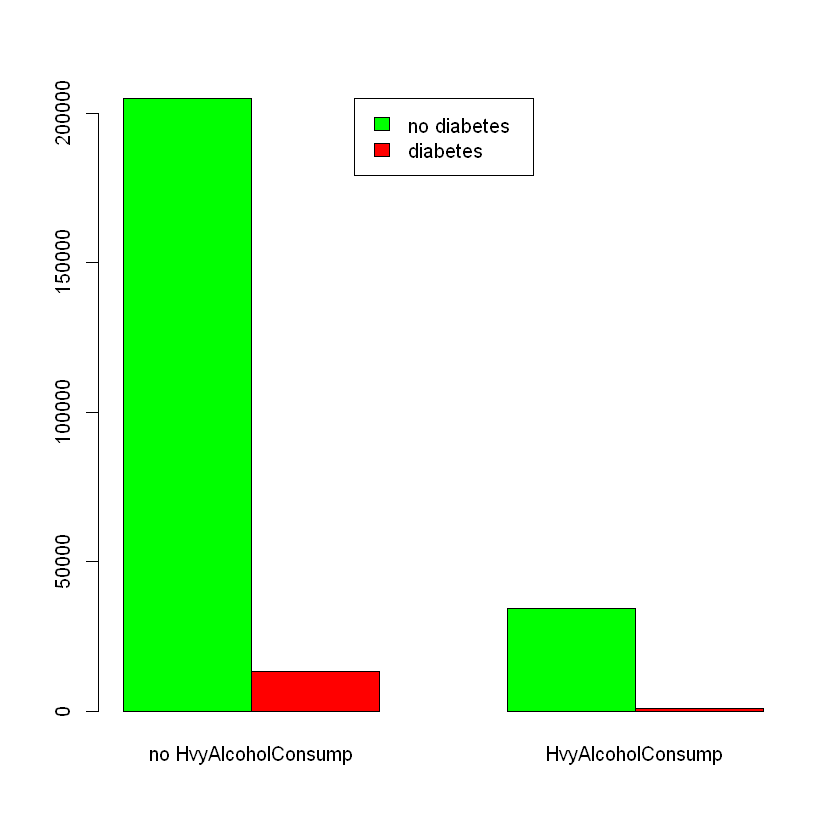

[1] "AnyHealthcare"


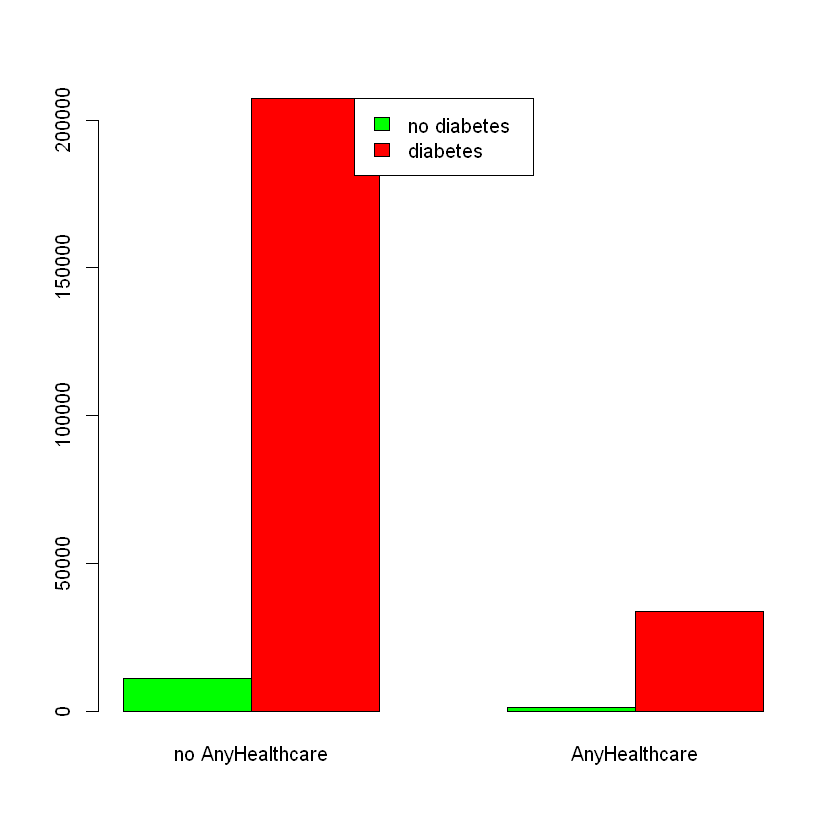

[1] "NoDocbcCost"


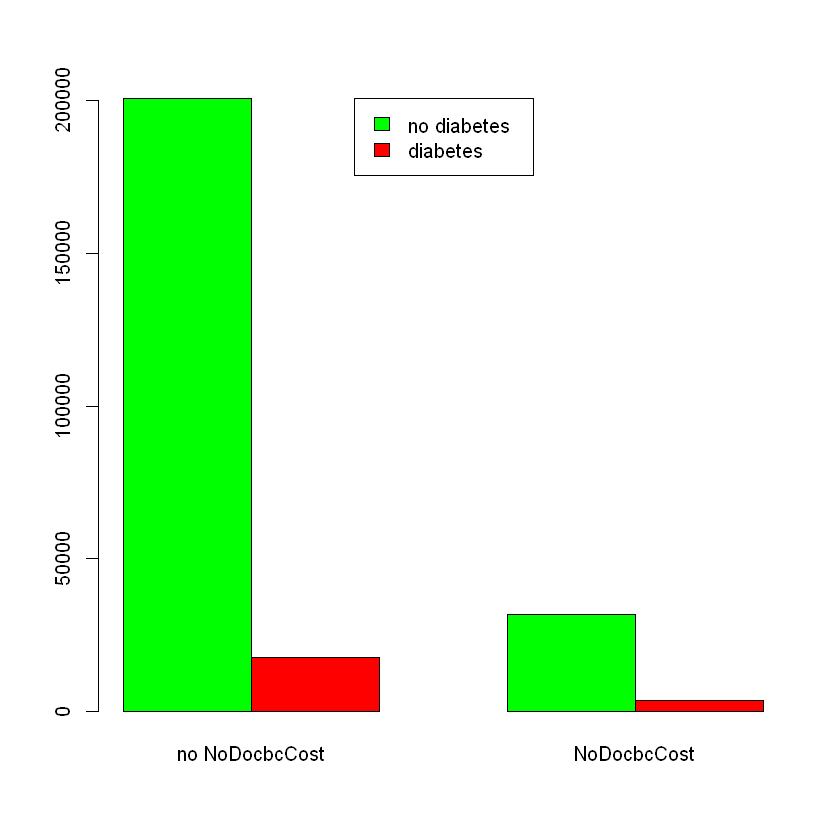

[1] "DiffWalk"


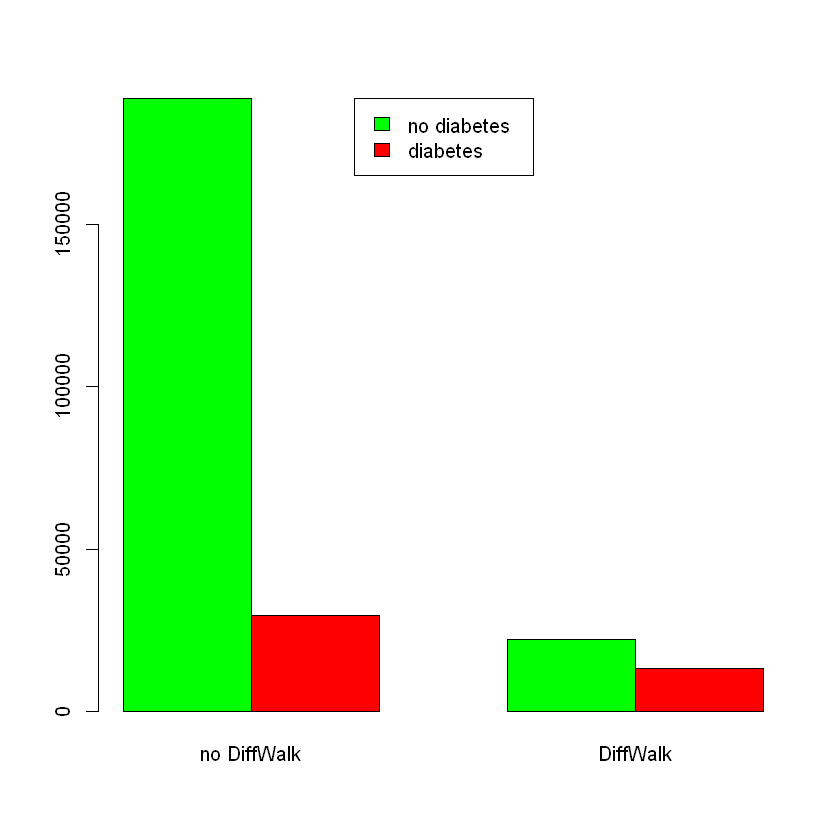

[1] "Sex"


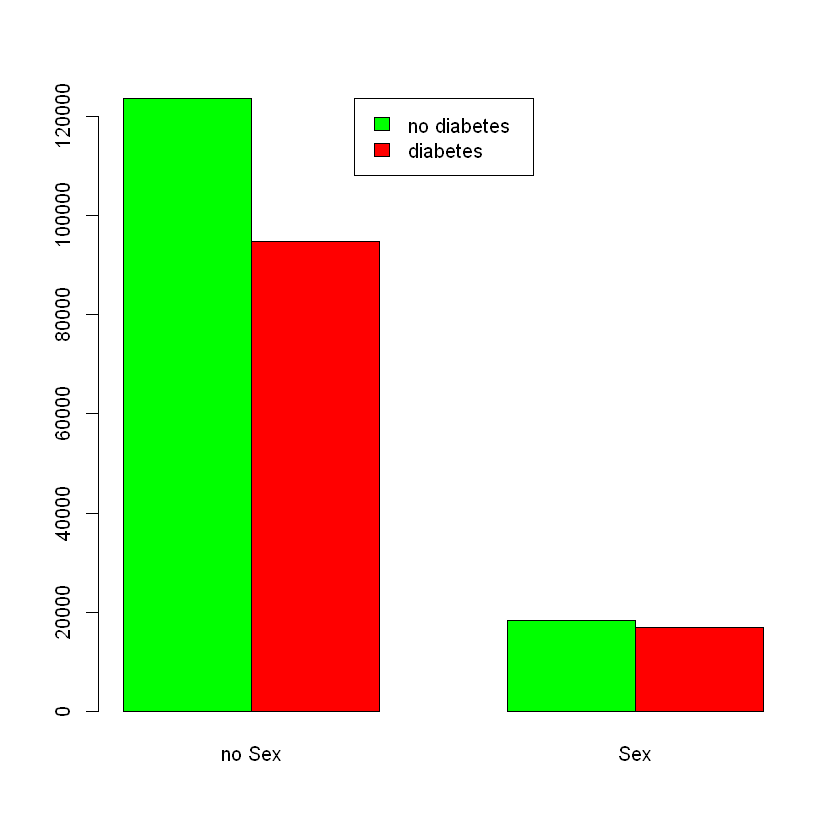

In [288]:
par(mfrow = c(1,1))
for (bin_col in binary_cols)
{
    contingency_table = table(factorized_df[, bin_col], factorized_df$Diabetes_binary)
    colnames(contingency_table) = c(sprintf("no %s", bin_col), bin_col)
    rownames(contingency_table) = c("no diabetes", "diabetes")
    plot_stack_bar_2x2(contingency_table)
    print(bin_col)
}

In [290]:
par(mfrow = c(1,1))
for (bin_col in binary_cols)
{
    summary_categorical_variables(factorized_df, bin_col, response_col)
}


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  253680 

 
             | Diabetes_binary 
      HighBP |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
   no HighBP |    136109 |      8742 |    144851 | 
             |     0.940 |     0.060 |     0.571 | 
             |     0.623 |     0.247 |           | 
             |     0.537 |     0.034 |           | 
-------------|-----------|-----------|-----------|
      HighBP |     82225 |     26604 |    108829 | 
             |     0.756 |     0.244 |     0.429 | 
             |     0.377 |     0.753 |           | 
             |     0.324 |     0.105 |           | 
-------------|-----------|-----------|-----------|
Column Total |    218334 |     35346 |    253680 | 
             |     0.861 |     0.139 |           | 
-----------

### 3.6. Categorical - ordinal variables analysis

In [291]:
ordinal_cols

[1] "GenHlth"   "Age"       "Education" "Income"

In [292]:
for (ord_col in ordinal_cols)
{
    summary_categorical_variables(df, ord_col, response_col, is.binary = F)
}


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  253680 

 
             | Diabetes_binary 
     GenHlth |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           1 |     44159 |      1140 |     45299 | 
             |     0.975 |     0.025 |     0.179 | 
             |     0.202 |     0.032 |           | 
             |     0.174 |     0.004 |           | 
-------------|-----------|-----------|-----------|
           2 |     82703 |      6381 |     89084 | 
             |     0.928 |     0.072 |     0.351 | 
             |     0.379 |     0.181 |           | 
             |     0.326 |     0.025 |           | 
-------------|-----------|-----------|-----------|
           3 |     62189 |     13457 |     75646 | 
             |     0.822 |     0.178 |     0.298 | 
           

#### 3.6.1. GenHlth

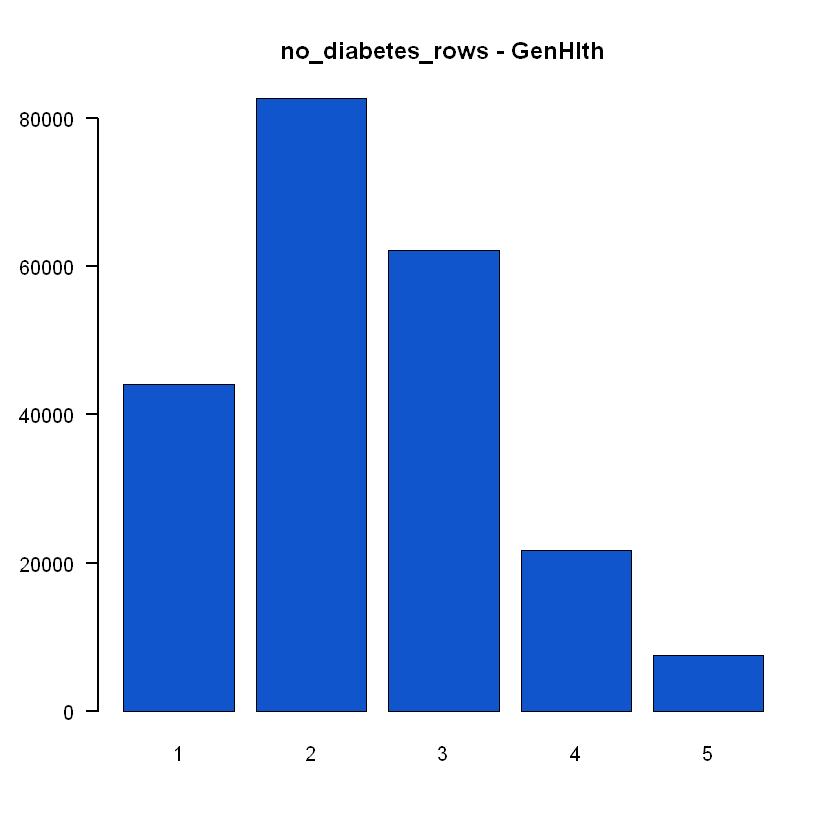

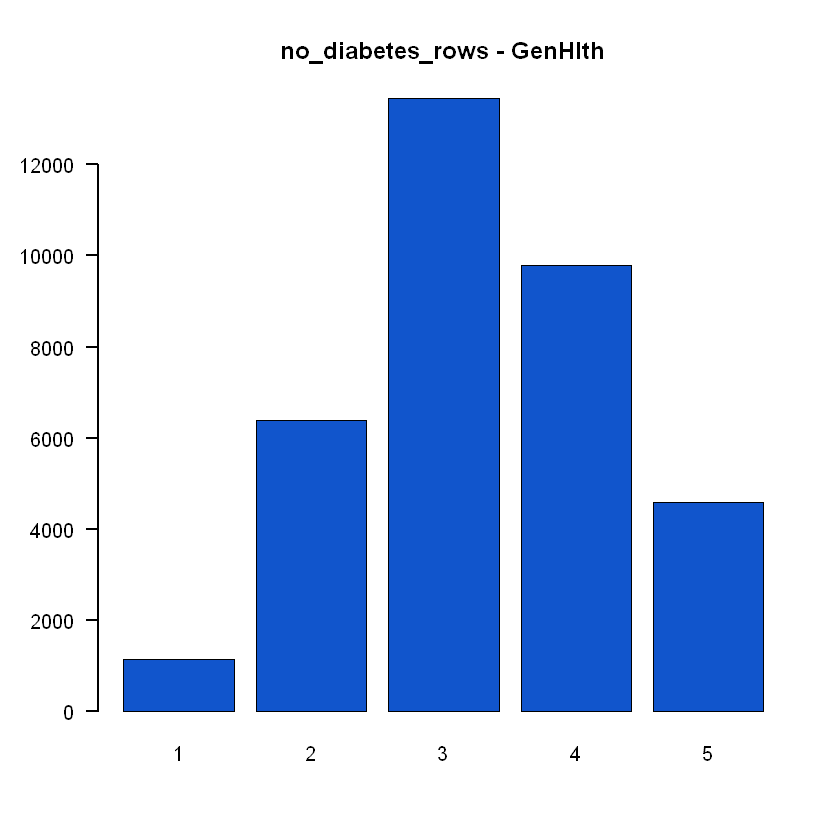

In [296]:
plot_ordinal_data(factorized_df, "GenHlth")

#### 3.6.2. Age

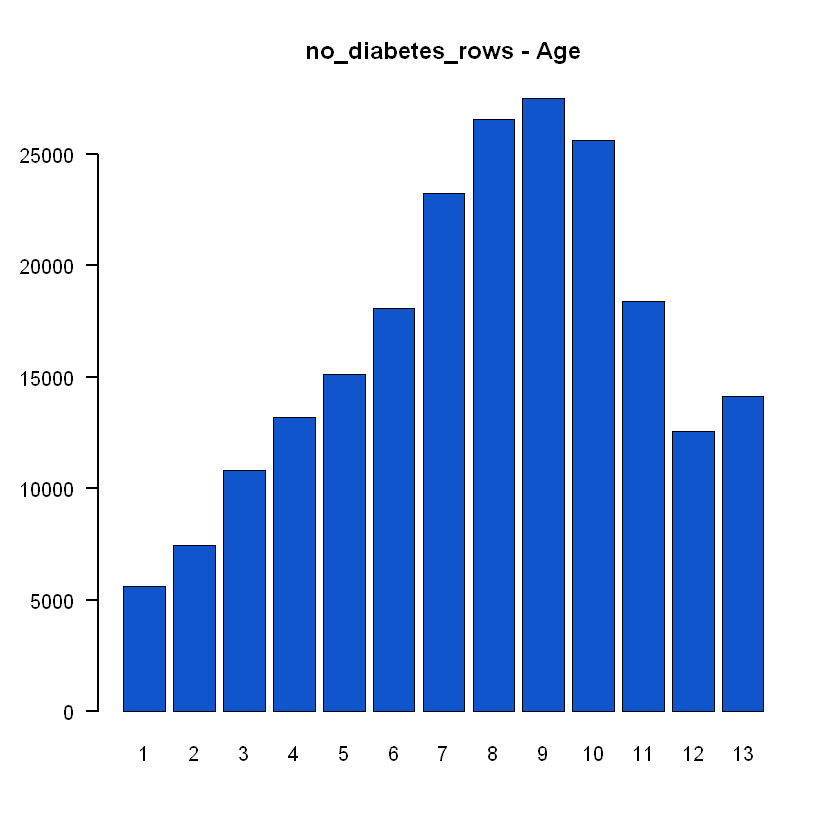

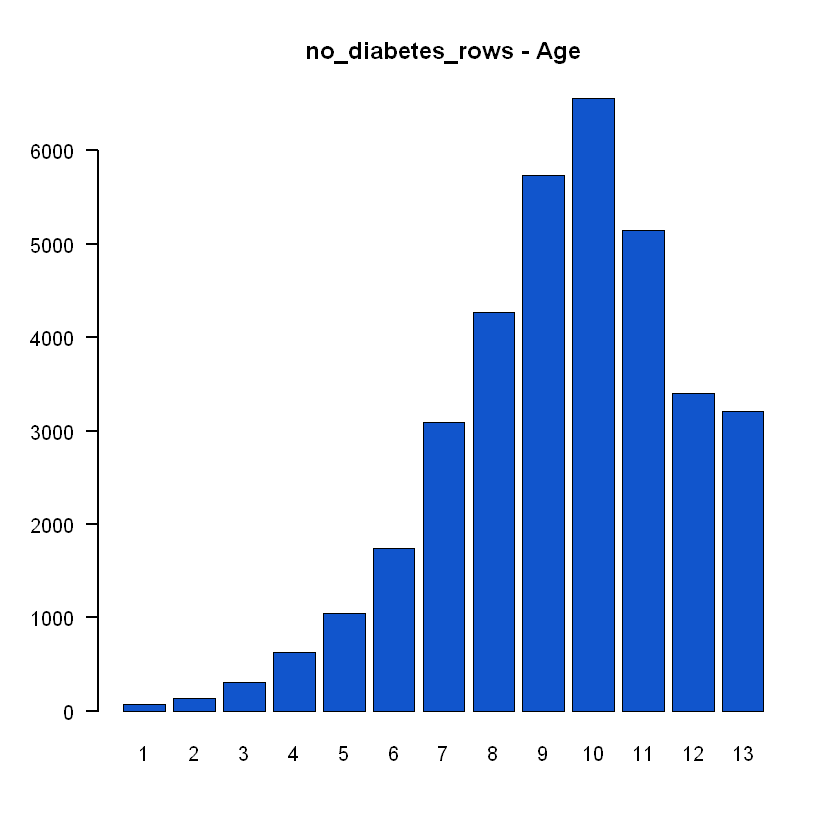

In [298]:
plot_ordinal_data(factorized_df, "Age")

#### 3.6.3. Education

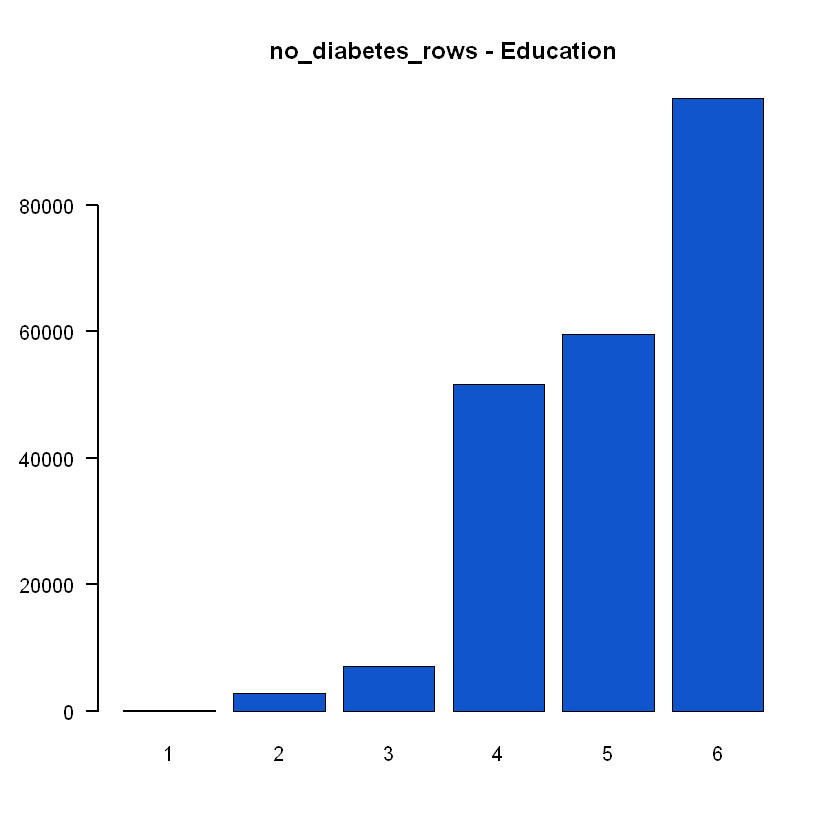

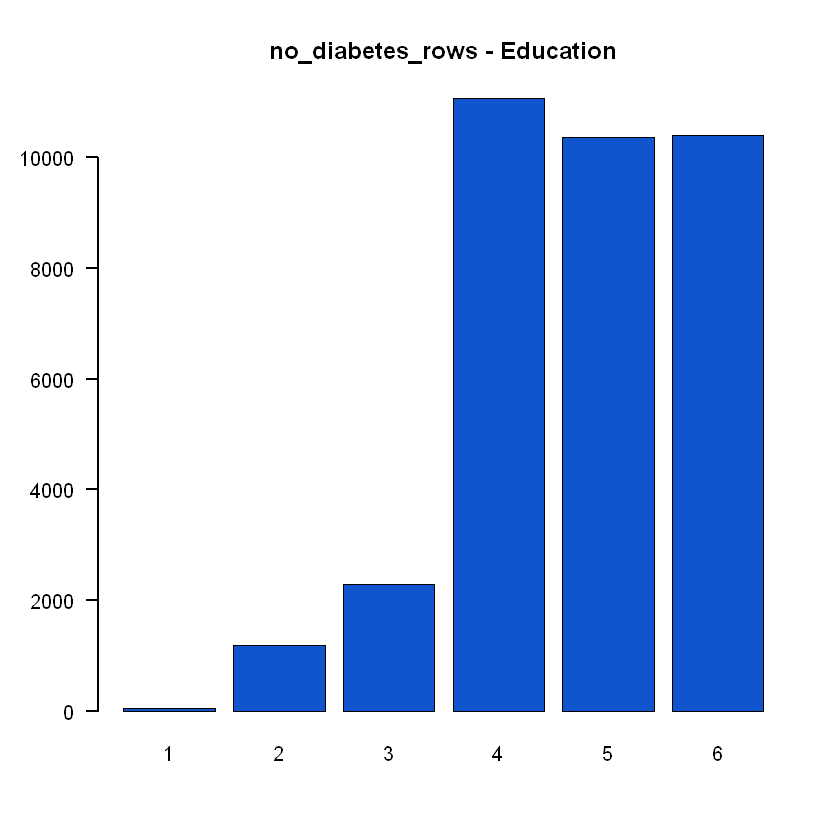

In [299]:
plot_ordinal_data(factorized_df, "Education")

#### 3.6.4. Income

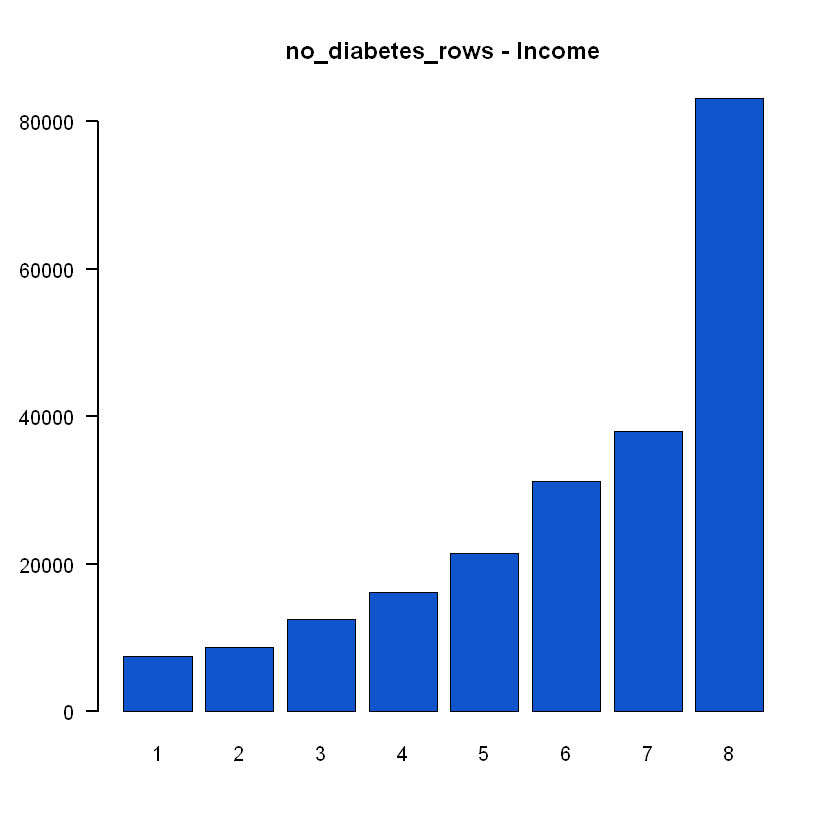

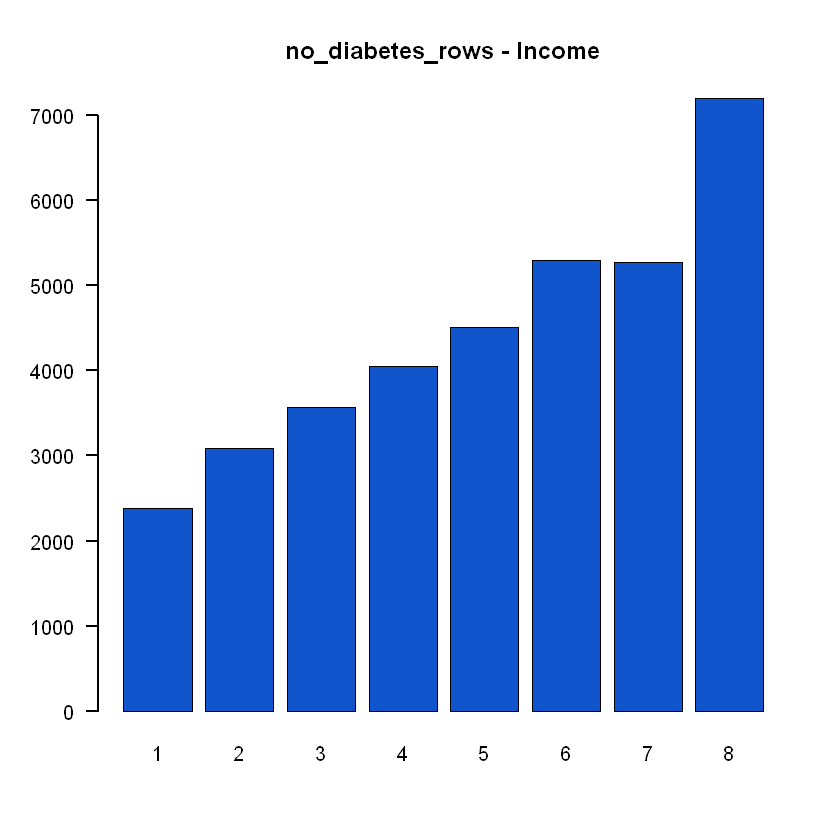

In [300]:
plot_ordinal_data(factorized_df, "Income")

### 3.7. Correlation analysis

In [301]:
all_colnames = colnames(factorized_df)

In [302]:
correlation_matrix = matrix(0, nrow = length(all_colnames), ncol = length(all_colnames), dimnames = list(all_colnames, all_colnames))

In [305]:
for (row_index in 1:nrow(correlation_matrix))
{
    for (col_index in row_index:ncol(correlation_matrix))
    {
        if (row_index == col_index)
        {
            correlation_matrix[row_index, col_index] = 1
        }
        else
        {
            correlation_matrix[row_index, col_index] = get_correlation(factorized_df, all_colnames[row_index],
                                                                       all_colnames[col_index], numerical_cols,
                                                                       binary_cols, ordinal_cols, response_col)
        }
    }
}

[1] "2 binary variables"
[1] "2 binary variables"
[1] "Binary variable vs numerical variable"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "At least one ordinal variable"
[1] "Binary variable vs numerical variable"
[1] "Binary variable vs numerical variable"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "At least one ordinal variable"
[1] "At least one ordinal variable"
[1] "At least one ordinal variable"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "Binary variable vs numerical variable"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "2 binary variables"
[1] "At least one ordinal variable"
[1] "Binary variable vs numerical variable"


In [307]:
correlation_matrix

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
HighBP,1,0.2982,0.09851,0.21374812,0.09699000,0.12960000,0.20940000,0.1253000,0.04055000,0.06127000,⋯,0.01736000,0.27684409,0.056455917,0.161211571,0.2236000,0.052210000,0.293883910,-0.132261074,-0.15907727,0.26310000
HighChol,0,1.0000,0.08564,0.10672208,0.09130000,0.09262000,0.18080000,0.0780500,0.04086000,0.03987000,⋯,0.01331000,0.19044111,0.062069154,0.121750528,0.1447000,0.031210000,0.227197645,-0.064141477,-0.07805095,0.20030000
CholCheck,0,0.0000,1.00000,0.03449509,0.00992900,0.02416000,0.04421000,0.0041900,0.02385000,0.00612100,⋯,0.05826000,0.04230765,-0.008365598,0.031774808,0.0405900,0.022120000,0.079782773,0.003605023,0.01355233,0.06476000
BMI,0,0.0000,0.00000,1.00000000,0.01380447,0.02015266,0.05290426,-0.1472936,-0.08751812,-0.06227519,⋯,0.05820629,0.20044778,0.085310159,0.121141107,0.1970778,0.042950303,-0.018682591,-0.096272782,-0.06913474,0.21684306
Smoker,0,0.0000,0.00000,0.00000000,1.00000000,0.06117000,0.11440000,0.0874000,0.07767000,0.03068000,⋯,0.04895000,0.14513867,0.092196474,0.116459714,0.1225000,0.093660000,0.101764840,-0.161695760,-0.11779172,0.06079000
Stroke,0,0.0000,0.00000,0.00000000,0.00000000,1.00000000,0.20300000,0.0691500,0.01339000,0.04112000,⋯,0.03480000,0.14940699,0.070171812,0.148944169,0.1766000,0.002978000,0.110086876,-0.067979132,-0.10985834,0.10580000
HeartDiseaseorAttack,0,0.0000,0.00000,0.00000000,0.00000000,0.00000000,1.00000000,0.0873000,0.01979000,0.03917000,⋯,0.03100000,0.22111285,0.064621292,0.181697536,0.2127000,0.086100000,0.194173045,-0.089351076,-0.12562478,0.17730000
PhysActivity,0,0.0000,0.00000,0.00000000,0.00000000,0.00000000,0.00000000,1.0000000,0.14280000,0.15310000,⋯,0.06164000,-0.23388958,-0.125587088,-0.219229522,0.2532000,0.032480000,-0.075105057,0.186553009,0.17937530,0.11810000
Fruits,0,0.0000,0.00000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,1.00000000,0.25430000,⋯,0.04424000,-0.09627343,-0.068217375,-0.044633325,0.0483500,0.091170000,0.057094063,0.107068517,0.06784869,0.04078000
Veggies,0,0.0000,0.00000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,1.00000000,⋯,0.03223000,-0.11185121,-0.058883553,-0.064290327,0.0805100,0.064770000,-0.009572817,0.144059557,0.13262035,0.05658000


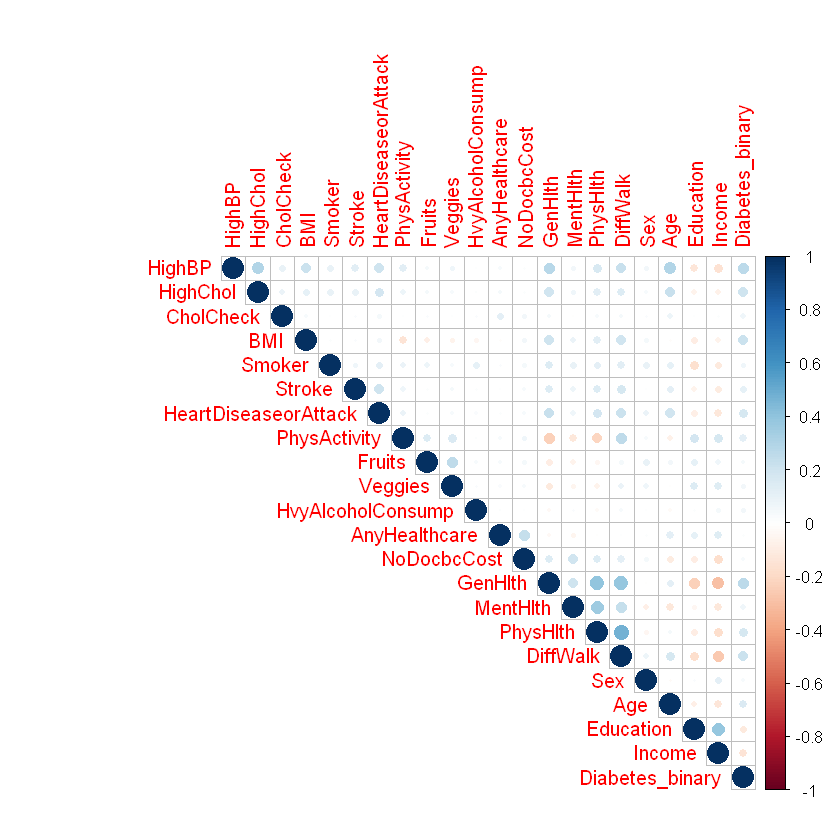

In [308]:
corrplot::corrplot(correlation_matrix, method="circle", type="upper")

## 4. Model building

### 3.2. Dataset oversampling

In [27]:
index = caret::createDataPartition(df$Diabetes_binary, p = 0.8, list = FALSE)
training_data = df[index, ]
testing_data = df[-index, ]

nrow(training_data)
nrow(testing_data)
nrow(training_data[training_data$Diabetes_binary == 1, ]) / nrow(training_data)
nrow(testing_data[testing_data$Diabetes_binary == 1, ]) / nrow(testing_data)

[1] 202944

[1] 50736

[1] 0.1394178

[1] 0.138994

### 3.3. Training dataset oversampling

In [28]:
table(training_data$Diabetes_binary)


     0      1 
174650  28294 

In [29]:
install.packages("ROSE")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [30]:
library(ROSE)

Loaded ROSE 0.0-4




In [31]:
balanced_training_data <- ovun.sample(Diabetes_binary ~  ., data = training_data,
                                  p = 0.5, seed = SEED,
                                  method = "over")$data

In [32]:
table(balanced_training_data$Diabetes_binary)


     0      1 
174650 174487 

In [33]:
balanced_training_data

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,40,1,0,0,0,0,1,⋯,0,5,18,15,1,0,9,4,3,0
2,0,0,0,25,1,0,0,1,0,0,⋯,1,3,0,0,0,0,7,6,1,0
3,1,1,1,28,0,0,0,0,1,0,⋯,1,5,30,30,1,0,9,4,8,0
4,1,0,1,27,0,0,0,1,1,1,⋯,0,2,0,0,0,0,11,3,6,0
5,1,1,1,24,0,0,0,1,1,1,⋯,0,2,3,0,0,0,11,5,4,0
6,1,1,1,25,1,0,0,1,1,1,⋯,0,2,0,2,0,1,10,6,8,0
7,1,0,1,30,1,0,0,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
8,0,0,1,24,0,0,0,0,0,1,⋯,0,2,0,0,0,1,8,4,3,0
9,1,1,1,34,1,0,0,0,1,1,⋯,0,3,0,30,1,0,10,5,1,0


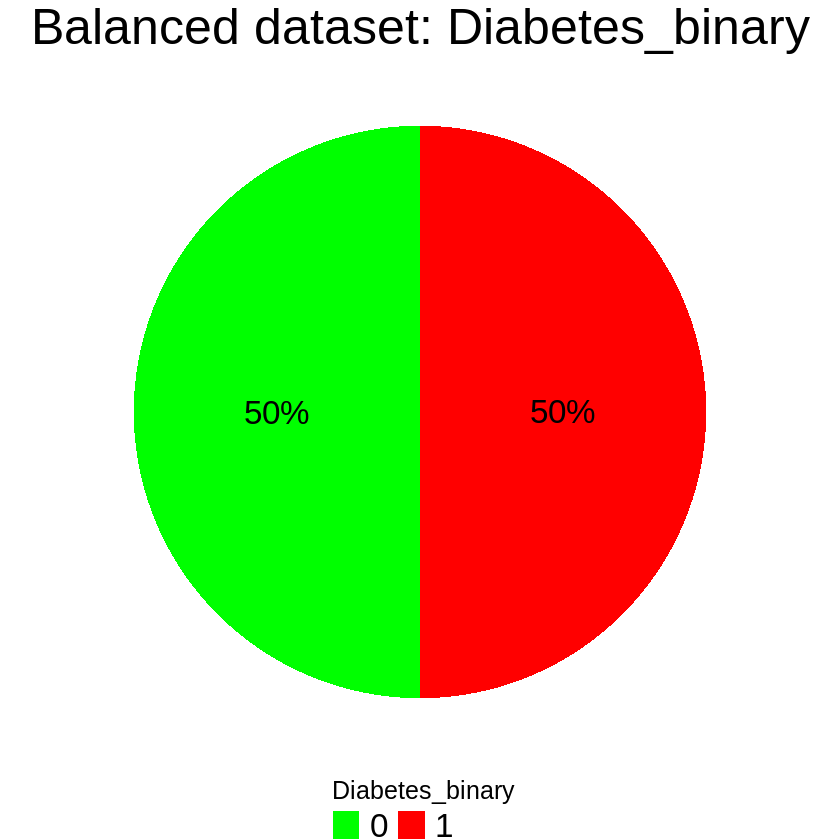

In [34]:
plot_binary_distribution(balanced_training_data, "Diabetes_binary", "Balanced dataset: Diabetes_binary")

In [35]:
with_diabetes_rows = which(balanced_training_data$Diabetes_binary == 1)
no_diabetes_rows = which(balanced_training_data$Diabetes_binary == 0)

In [106]:
str(balanced_training_data)

'data.frame':	349137 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 1 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 1 2 2 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 24 34 33 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 1 2 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 2 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 1 1 2 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "

### 4.1. Data standardization

#### BMI

#### MentHlth

#### PhysHlth

In [110]:
str(balanced_training_data)

'data.frame':	349137 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 1 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 1 2 2 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 24 34 33 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 1 2 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 2 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 1 1 2 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "

In [111]:
str(testing_data)

'data.frame':	50736 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 1 2 1 1 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 1 1 1 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  25 26 37 26 31 28 20 27 21 32 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 2 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 2 1 1 2 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 2 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 2 1 1 2 1 1 2 1 2 2 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 1 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 2 2 1 1 2 2 1 2 1 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "0

### 4.3. Build the model

In [112]:
balanced_training_data

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<ord>,<int>,<int>,<fct>,<fct>,<ord>,<ord>,<ord>,<fct>
1,1,1,1,40,1,0,0,0,0,1,⋯,0,5,18,15,1,0,9,4,3,0
2,0,0,0,25,1,0,0,1,0,0,⋯,1,3,0,0,0,0,7,6,1,0
3,1,1,1,28,0,0,0,0,1,0,⋯,1,5,30,30,1,0,9,4,8,0
4,1,0,1,27,0,0,0,1,1,1,⋯,0,2,0,0,0,0,11,3,6,0
5,1,1,1,24,0,0,0,1,1,1,⋯,0,2,3,0,0,0,11,5,4,0
6,1,1,1,25,1,0,0,1,1,1,⋯,0,2,0,2,0,1,10,6,8,0
7,1,0,1,30,1,0,0,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
8,0,0,1,24,0,0,0,0,0,1,⋯,0,2,0,0,0,1,8,4,3,0
9,1,1,1,34,1,0,0,0,1,1,⋯,0,3,0,30,1,0,10,5,1,0


In [113]:
my_model = glm(Diabetes_binary ~ . , data = balanced_training_data, family = binomial)

In [114]:
min_model = glm(Diabetes_binary ~ 1 , data = balanced_training_data, family = binomial)

#### 4.3.1. AIC stepwise

In [115]:
# AIC
aic_result = MASS::stepAIC(my_model, direction = "backward", k = 2, scope = list(upper = my_model, lower = min_model))

Start:  AIC=355273.2
Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Smoker + 
    Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + Veggies + 
    HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + GenHlth + 
    MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + 
    Income

                       Df Deviance    AIC
<none>                      355181 355273
- NoDocbcCost           1   355186 355276
- Smoker                1   355186 355276
- Veggies               1   355187 355277
- AnyHealthcare         1   355192 355282
- MentHlth              1   355201 355291
- Fruits                1   355207 355297
- PhysActivity          1   355214 355304
- PhysHlth              1   355233 355323
- Stroke                1   355298 355388
- Education             5   355335 355417
- DiffWalk              1   355333 355423
- HeartDiseaseorAttack  1   355755 355845
- Income                7   356091 356169
- HvyAlcoholConsump     1   356316 356406
- Sex                   1   356

In [116]:
# Tự chạy
# aic_forward_result = MASS::stepAIC(min_model, direction = "forward", k = 2, scope = list(upper = my_model, lower = min_model))

In [117]:
# # Best AIC model
# Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 +
#     Smoker + Stroke + HeartDiseaseorAttack + PhysActivity + Fruits +
#     Veggies + HvyAlcoholConsump + AnyHealthcare + NoDocbcCost +
#     GenHlth + MentHlth + PhysHlth + havePhysHlth + DiffWalk +
#     Sex + Age + Education + Income

#### 4.3.2. BIC stepwise

In [118]:
# Tự chạy
# bic_result = step(min_model, direction = "forward", k = log(nrow(balanced_training_data), scope = list(upper = my_model, lower = min_model)))

In [119]:
# BIC
# bic_result = MASS::stepAIC(my_model, direction = "backward", k = log(nrow(balanced_training_data)))

In [120]:
# # Best BIC model
# Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 +
#     Stroke + HeartDiseaseorAttack + PhysActivity + Veggies +
#     HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk +
#     Sex + Age + Education + Income

### 4.4. Best model selection

In [121]:
best_aic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Smoker +
    Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + Veggies +
    HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + GenHlth +
    MentHlth + PhysHlth + DiffWalk + Sex + Age + Education +
    Income, data = balanced_training_data, family = binomial)

In [122]:
best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke +
    HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump +
    GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education +
    Income, data = balanced_training_data, family = binomial)

In [123]:
# COMMENT
# Choose "best_bic_model"

In [124]:
# best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke +
#     HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump +
#     GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education +
#     Income, data = balanced_training_data, family = binomial)

### 4.5. Link function selection

In [125]:
# Create the dataframe
aic_link_function_df <- data.frame(
  link_function_name = c("logit", "probit", "cauchit", "cloglog"),
  aic_value = rep(0, 4)
)
aic_link_function_df

link_function_name,aic_value
<chr>,<dbl>
logit,0
probit,0
cauchit,0
cloglog,0


In [126]:
logit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke +
    HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump +
    GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education +
    Income, data = balanced_training_data, family = binomial(link = "logit"))

In [127]:
aic_link_function_df[1, 2] = summary(logit_best_bic_model)$aic

In [128]:
probit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke +
    HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump +
    GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education +
    Income, data = balanced_training_data, family = binomial(link = "probit"))

In [129]:
aic_link_function_df[2, 2] = summary(probit_best_bic_model)$aic

In [130]:
cauchit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke +
    HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump +
    GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education +
    Income, data = balanced_training_data, family = binomial(link = "cauchit"))

In [131]:
aic_link_function_df[3, 2] = summary(cauchit_best_bic_model)$aic

In [132]:
cloglog_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke +
    HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump +
    GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education +
    Income, data = balanced_training_data, family = binomial(link = "cloglog"))

In [133]:
aic_link_function_df[4, 2] = summary(cloglog_best_bic_model)$aic

In [134]:
aic_link_function_df

link_function_name,aic_value
<chr>,<dbl>
logit,355288.7
probit,355536.0
cauchit,357369.1
cloglog,360536.3


In [135]:
aic_link_function_df[which.min(aic_link_function_df$aic_value), ]

,link_function_name,aic_value
,<chr>,<dbl>
1,logit,355288.7


In [136]:
# COMMENT
# Best link function model
# logit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke +
#     HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump +
#     GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education +
#     Income, data = balanced_training_data, family = binomial(link = "logit"))

## 5. Model training and evaluating

In [137]:
evaluate_classification_model = function(binary_predictions, binary_real_data)
{
    accuracy = mean(binary_predictions == binary_real_data)
    precision <- sum(binary_predictions == 1 & binary_real_data == 1) / sum(binary_predictions == 1)
    recall <- sum(binary_predictions == 1 & binary_real_data == 1) / sum(binary_real_data == 1)
    f1_score <- 2 * precision * recall / (precision + recall)

    # Print the results
    cat("Accuracy:", accuracy, "\n")
    cat("Precision:", precision, "\n")
    cat("Recall:", recall, "\n")
    cat("F1 Score:", f1_score, "\n")
}

one_for_all_metric = function(model, new_data, variable_name, binary_threshold = 0.5)
{
    predictions = predict(model, newdata = new_data, type = "response")
    binary_predictions = ifelse(predictions >= binary_threshold, 1, 0)
    actual_response = new_data[, variable_name]

    cat("\n", "Metric 1: ANOVA", "\n")
    print(summary(model))

    cat("\n", "Metric 2: Model performance", "\n")
    print(confusionMatrix(table(binary_predictions, actual_response)))
    evaluate_classification_model(binary_predictions, actual_response)

    cat("\n", "Metric 3: ROC curve - AUC", "\n")
    roc_score = pROC::roc(actual_response, binary_predictions)
    cat("AUC: ", auc(roc_score))
    plot(roc_score ,main = "ROC curve -- Logistic Regression ")

    cat("\n", "Metric 4: Overdispersion tests", "\n")
    DHARMa::testDispersion(model, alternative = "greater")

    cat("\n", "Metric 4: Goodness-of-fit", "\n")
    summary_model = summary(model)
    cat("residual:", summary_model$deviance, "\n")
    cat("dof:", summary_model$df[2], "\n")
    cat("goodness-of-fit:", 1- pchisq(summary_model$deviance, df = summary_model$df[2]))

    cat("\n", "Metric 5: QQ-norm", "\n")
    qqnorm(residuals(probit_best_bic_model))
    abline(a = 0, b = 1, col = "red")
}


 Metric 1: ANOVA 

Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + 
    HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + 
    Sex + Age + Education + Income, family = binomial(link = "logit"), 
    data = balanced_training_data)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -4.4487834  0.0496118 -89.672  < 2e-16 ***
HighBP1                0.6937649  0.0089231  77.750  < 2e-16 ***
HighChol1              0.5366553  0.0085441  62.810  < 2e-16 ***
CholCheck1             1.3212470  0.0365488  36.150  < 2e-16 ***
BMI                    0.0705985  0.0007035 100.348  < 2e-16 ***
Stroke1                0.1964752  0.0183292  10.719  < 2e-16 ***
HeartDiseaseorAttack1  0.3020685  0.0127526  23.687  < 2e-16 ***
PhysActivity1         -0.0559654  0.0095433  -5.864 4.51e-09 ***
Fruits1               -0.0487627  0.0086677  -5.626 1.85e-08 ***
Hv

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC:  0.7493286
 Metric 4: Overdispersion tests 


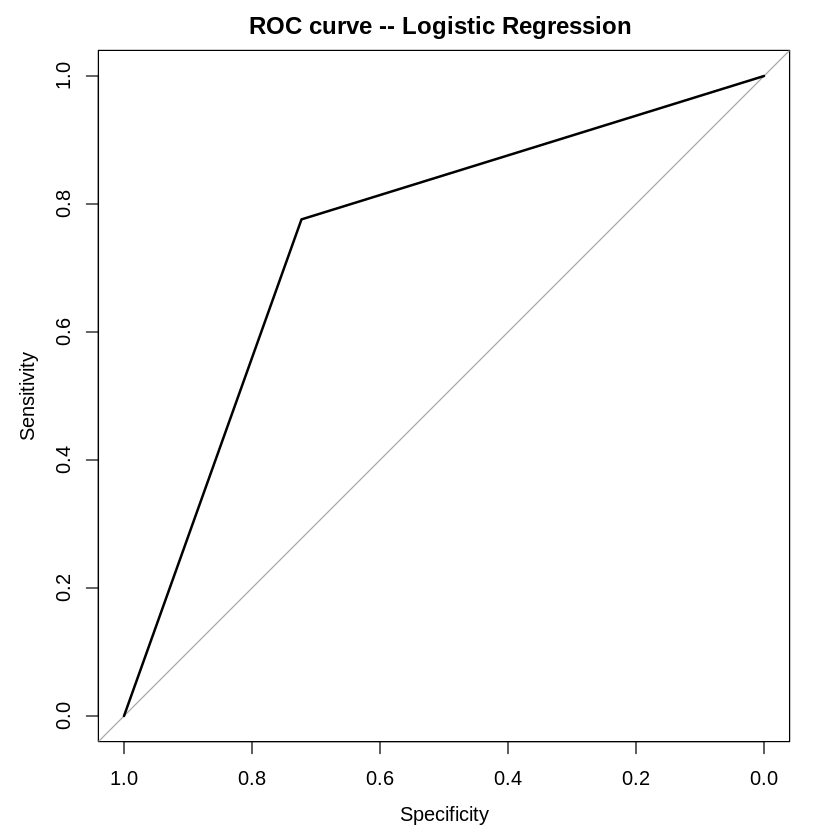


 Metric 4: Goodness-of-fit 
residual: 355204.7 
dof: 349095 
goodness-of-fit: 1.79079e-13
 Metric 5: QQ-norm 


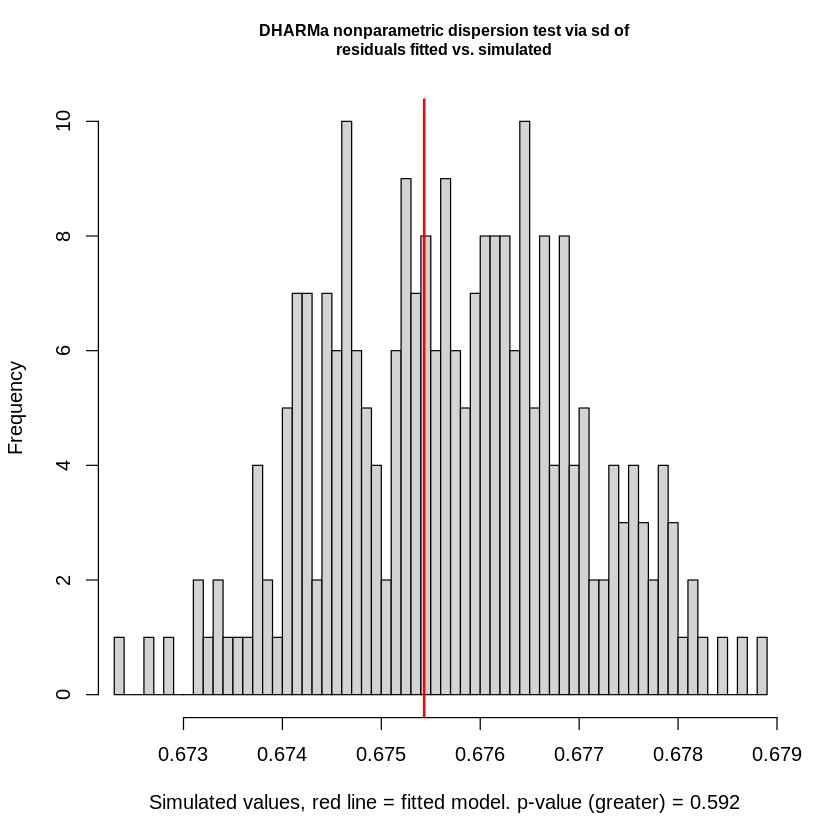

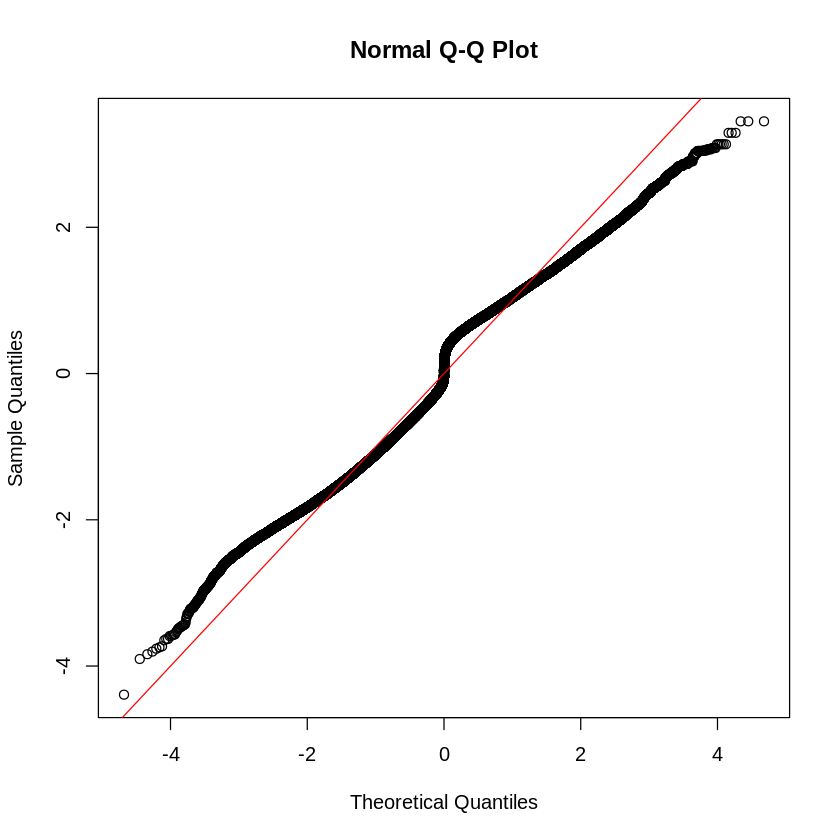

In [138]:
one_for_all_metric(logit_best_bic_model, balanced_training_data, "Diabetes_binary")


 Metric 1: ANOVA 

Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + 
    HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + 
    Sex + Age + Education + Income, family = binomial(link = "logit"), 
    data = balanced_training_data)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -4.4487834  0.0496118 -89.672  < 2e-16 ***
HighBP1                0.6937649  0.0089231  77.750  < 2e-16 ***
HighChol1              0.5366553  0.0085441  62.810  < 2e-16 ***
CholCheck1             1.3212470  0.0365488  36.150  < 2e-16 ***
BMI                    0.0705985  0.0007035 100.348  < 2e-16 ***
Stroke1                0.1964752  0.0183292  10.719  < 2e-16 ***
HeartDiseaseorAttack1  0.3020685  0.0127526  23.687  < 2e-16 ***
PhysActivity1         -0.0559654  0.0095433  -5.864 4.51e-09 ***
Fruits1               -0.0487627  0.0086677  -5.626 1.85e-08 ***
Hv

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC:  0.744007
 Metric 4: Overdispersion tests 


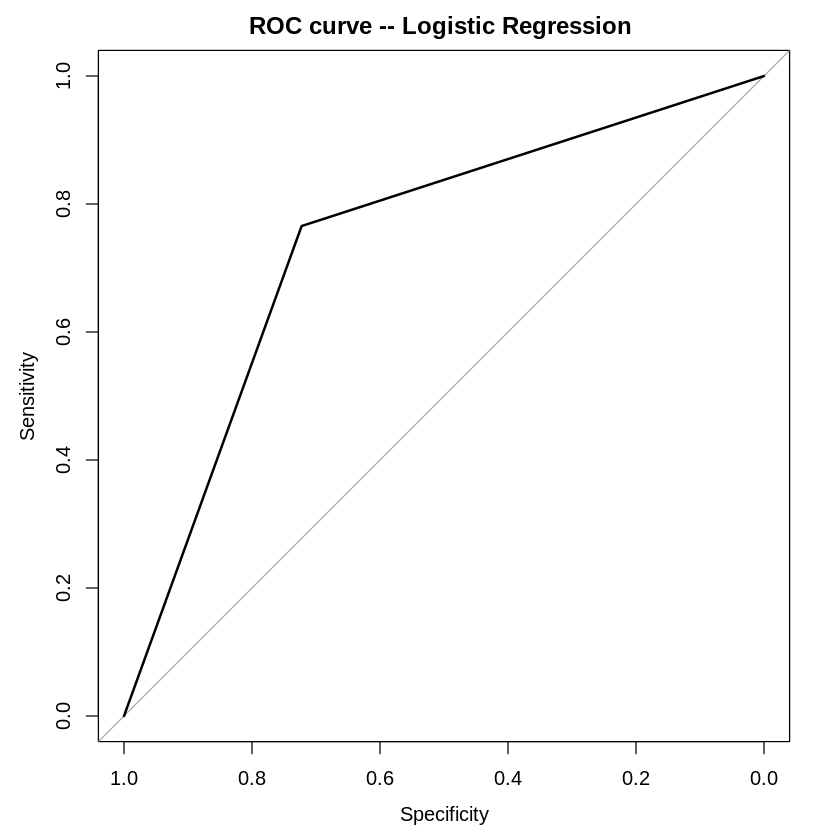


 Metric 4: Goodness-of-fit 
residual: 355204.7 
dof: 349095 
goodness-of-fit: 1.79079e-13
 Metric 5: QQ-norm 


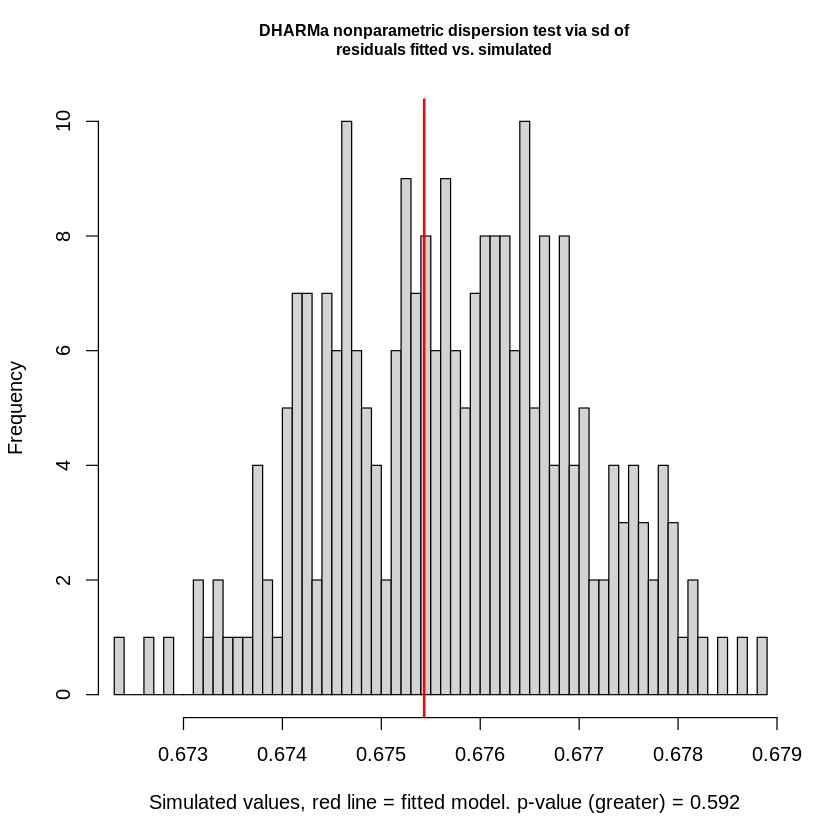

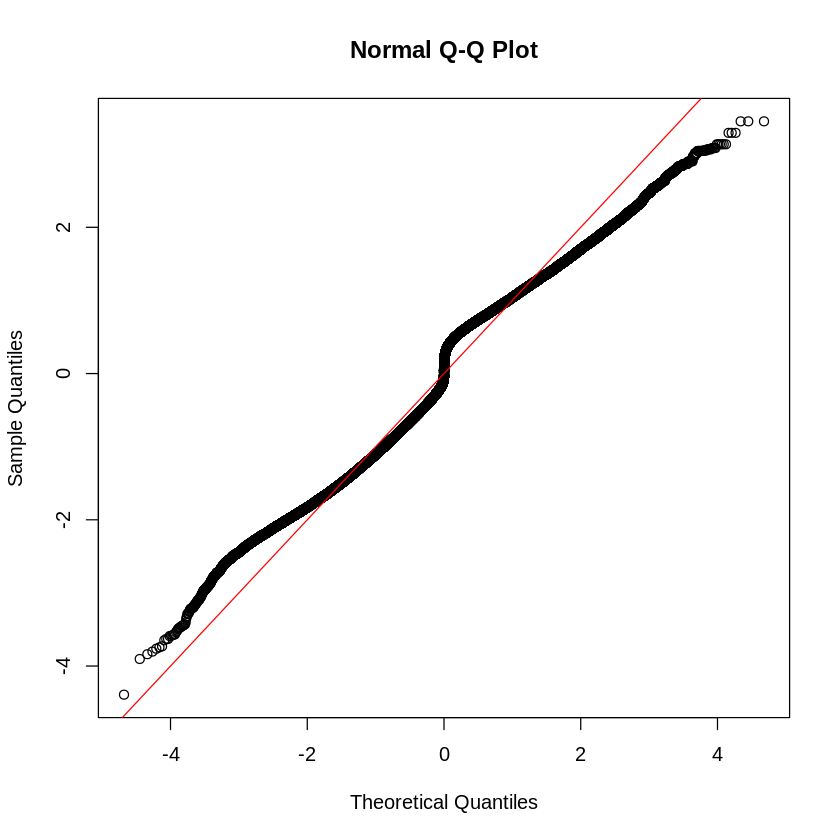

In [139]:
one_for_all_metric(logit_best_bic_model, testing_data, "Diabetes_binary")

## TEST